In [1]:
import pandas as pd
import os 
import sys
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px

# **LOADING DATAs**

In [2]:
ba_beers = pd.read_csv('../generated/new_ba_beers.csv')
ba_breweries = pd.read_csv('../generated/new_ba_breweries.csv')
ba_users = pd.read_csv('../generated/new_ba_users.csv')
ba_reviews = pd.read_parquet('../generated/new_ba_reviews.parquet')

rb_beers = pd.read_csv('../generated/new_rb_beers.csv')
rb_breweries = pd.read_csv('../generated/new_rb_breweries.csv')
rb_users = pd.read_csv('../generated/new_rb_users.csv')
rb_reviews = pd.read_parquet('../generated/new_rb_reviews.parquet')

# Breweries exploration

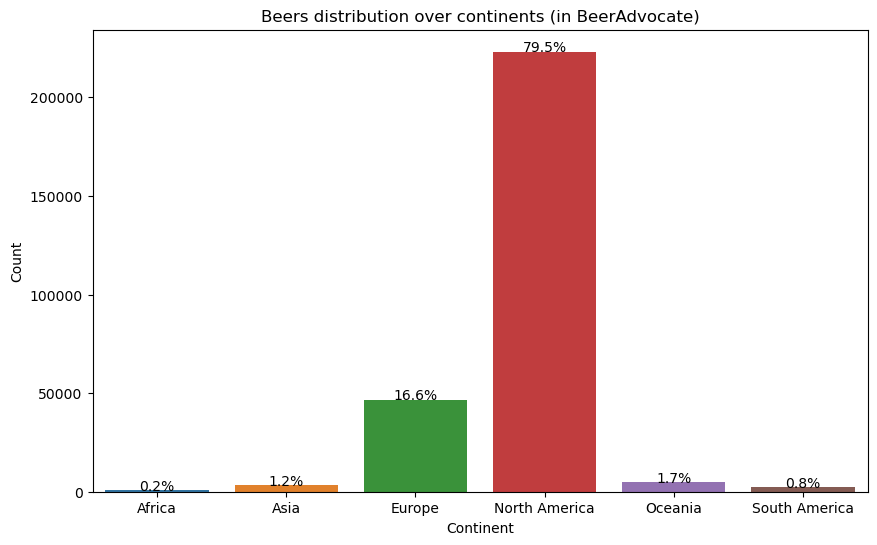

In [3]:
# Computation of percentages of continents
continent_counts = ba_beers["continent"].value_counts().sort_index()
total_count = continent_counts.sum()
continent_percentages = (continent_counts / total_count) * 100

# DataFrame for the plot
plot_df = pd.DataFrame({
    'Continent': continent_counts.index,
    'Count': continent_counts.values,
    'Percentage': continent_percentages.values
})

# Figure
fig, ax = plt.subplots(figsize=(10, 6))

# Count
sns.barplot(x='Continent', y='Count', data=plot_df, ax=ax, color='orange', label="Count", palette="tab10", hue="Continent")

# Percentages
for index, row in plot_df.iterrows():
    ax.text(index, row['Count'], f"{row['Percentage']:.1f}%", color='black', ha="center")

# Titles 
ax.set_title("Beers distribution over continents (in BeerAdvocate)")
ax.set_ylabel("Count")
ax.set_xlabel("Continent");

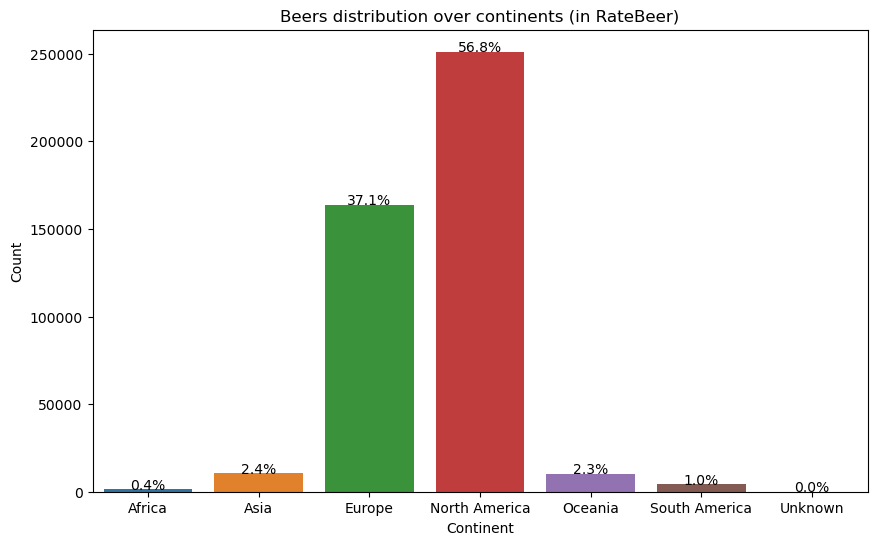

In [4]:
# Computation of percentages of continents
continent_counts = rb_beers["continent"].value_counts().sort_index()
total_count = continent_counts.sum()
continent_percentages = (continent_counts / total_count) * 100

# DataFrame for the plot
plot_df = pd.DataFrame({
    'Continent': continent_counts.index,
    'Count': continent_counts.values,
    'Percentage': continent_percentages.values
})

# Figure
fig, ax = plt.subplots(figsize=(10, 6))

# Count
sns.barplot(x='Continent', y='Count', data=plot_df, ax=ax, color='orange', label="Count", palette="tab10", hue="Continent")

# Percentages
for index, row in plot_df.iterrows():
    ax.text(index, row['Count'], f"{row['Percentage']:.1f}%", color='black', ha="center")

# Titles 
ax.set_title("Beers distribution over continents (in RateBeer)")
ax.set_ylabel("Count")
ax.set_xlabel("Continent");

# Ratings and beers exploration

In [5]:
ba_model = smf.ols("rating ~ appearance + aroma + palate + taste + overall - 1", ba_reviews, ).fit()
display(ba_model.summary())
print("Sum of parameters : ", ba_model.params.sum())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.512e+12
Date:                Thu, 05 Dec 2024   Prob (F-statistic):                        0.00
Time:                        21:22:50   Log-Likelihood:                      1.2609e+07
No. Observations:             2557577   AIC:                                 -2.522e+07
Df Residuals:                 2557572   BIC:                                 -2.522e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
appearance     0.0600   2.19e-06   2.75e+04      0.000       0.060       0.060
aroma          0.2401   2.55e-06    9.4e+04      0.000       0.240       0.240
palate         0.1001   2.77e-06   3.62e+04      0.000       0.100       0.100
taste          0.4000   3.29e-06   1.22e+05      0.000       0.400       0.400
overall        0.1999   3.16e-06   6.33e+04      0.000       0.200       0.200
==============================================================================
Omnibus:                   884506.576   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2200028.553
Skew:                           2.015   Prob(JB):                         0.00
Kurtosis:                       5.098   Cond. No.                         31.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sum of parameters :  1.0001904884619288


# Par type et continent

In [6]:
ba_reviews.groupby(["continent", "type"])[["appearance", "aroma", "palate", "taste", "overall", "rating"]].agg({"rating":["mean","sem"]})

rating          
                                mean       sem
continent     type                            
Africa        Ale           3.449213  0.061556
              Bitter        3.295000  0.276350
              IPA           3.681176  0.114721
              Lager         2.894120  0.019227
              Other         3.325366  0.064076
              Stout/Porter  3.370141  0.052055
Asia          Ale           3.688081  0.011065
              Bitter        3.570750  0.093537
              IPA           3.738189  0.022591
              Lager         2.837976  0.006744
              Other         3.405442  0.011735
              Stout/Porter  3.774141  0.011750
              Wheat/Sour    3.844286  0.091294
Europe        Ale           3.837480  0.001526
              Bitter        3.666264  0.004810
              IPA           3.887909  0.003541
              Lager         3.210433  0.003454
              Other         3.883421  0.001329
              Stout/Porter  3.915615  0.002376
              Wheat/Sour    3.998894  0.025952
North America Ale           3.822433  0.000660
              Bitter        3.719324  0.003248
              IPA           4.008069  0.000763
              Lager         3.153445  0.002519
              Other         3.739659  0.000857
              Stout/Porter  4.027639  0.000844
              Wheat/Sour    3.933240  0.006517
Oceania       Ale           3.515797  0.006653
              Bitter        3.264018  0.020857
              IPA           3.836734  0.011500
              Lager         2.749247  0.012332
              Other         3.442473  0.009514
              Stout/Porter  3.701554  0.009732
              Wheat/Sour    3.514000  0.163205
South America Ale           3.475734  0.017696
              Bitter        3.653462  0.086068
              IPA           3.827016  0.027717
              Lager         2.767380  0.017635
              Other         3.323594  0.015511
              Stout/Porter  3.577048  0.028211

In [7]:
fig = px.bar(
    ba_reviews.groupby(["continent", "type"])[["appearance", "aroma", "palate", "taste", "overall", "rating"]].mean().reset_index(),
    x="type",
    y="rating",
    facet_row="continent",
    color="continent",
    title="Ratings Per Continent",
    error_y="rating"
)

fig.update_yaxes(range=[3, 5])

fig.update_yaxes(title_text="Continent", matches="y", showticklabels=True)

fig.update_layout(
    title={'text': "Ratings Per Continent", 'x': 0.5, 'xanchor': 'center'},
    margin=dict(t=50),
    showlegend=False
)

# fig.show()
fig.write_html("../generated/figures/ba_style_continent_rating.html")

In [8]:
rb_reviews.groupby(["continent", "type"])[["appearance", "aroma", "palate", "taste", "overall", "rating"]].agg({"rating":["mean","sem"]})

rating          
                                mean       sem
continent     type                            
Africa        Ale           2.942857  0.019223
              Bitter        2.954217  0.040213
              IPA           3.391818  0.054828
              Lager         2.076740  0.006755
              Other         2.563110  0.017015
              Stout/Porter  3.106337  0.018985
Asia          Ale           3.248446  0.004195
              Bitter        3.101412  0.023968
              IPA           3.510080  0.009484
              Lager         2.087442  0.003330
              Other         2.910862  0.004535
              Saké          3.254325  0.038598
              Stout/Porter  3.434408  0.005644
              Wheat/Sour    3.566667  0.096677
Europe        Ale           3.330517  0.000525
              Bitter        3.061971  0.001077
              IPA           3.559893  0.001235
              Lager         2.406222  0.001435
              Other         3.158747  0.000587
              Saké          3.104505  0.024691
              Stout/Porter  3.564703  0.000853
              Wheat/Sour    3.637180  0.002890
North America Ale           3.406825  0.000488
              Bitter        3.261791  0.002330
              IPA           3.679139  0.000885
              Lager         2.358127  0.002160
              Other         3.326551  0.000647
              Saké          3.064286  0.093531
              Stout/Porter  3.666573  0.000690
              Wheat/Sour    3.780333  0.002881
Oceania       Ale           3.264227  0.002905
              Bitter        3.101005  0.011935
              IPA           3.670892  0.005868
              Lager         2.213962  0.006524
              Other         3.134960  0.004519
              Stout/Porter  3.515460  0.004523
              Wheat/Sour    3.560159  0.029068
South America Ale           3.104937  0.008139
              Bitter        3.183626  0.041718
              IPA           3.584079  0.017482
              Lager         2.036810  0.007547
              Other         2.941472  0.007270
              Stout/Porter  3.291682  0.011276
              Wheat/Sour    3.315000  0.096579
Unknown       Ale           2.937037  0.056932
              Bitter        2.185714  0.187881
              IPA           2.832143  0.093301
              Lager         2.117266  0.029215
              Other         2.098851  0.029484
              Stout/Porter  3.248649  0.038877

In [9]:
fig = px.bar(
    rb_reviews.groupby(["continent", "type"])[["appearance", "aroma", "palate", "taste", "overall", "rating"]].mean().reset_index(),
    x="type",
    y="rating",
    facet_row="continent",
    color="continent",
    title="Ratings Per Continent",
    error_y="rating"
)

fig.update_yaxes(range=[3, 5])

fig.update_yaxes(title_text="Continent", matches="y", showticklabels=True)

fig.update_layout(
    title={'text': "Ratings Per Continent", 'x': 0.5, 'xanchor': 'center'},
    margin=dict(t=50),
    showlegend=False
)

# fig.show()
fig.write_html("../generated/figures/rb_style_continent_rating.html")

# Calcul avg_computed

In [10]:
ba_beers[ba_beers['beer_id'] == 19590]

Unnamed: 0  beer_id      beer_name  brewery_id  \
24          24    19590  Barelegs Brew       10093   

                            brewery_name             style  nbr_ratings  \
24  Strangford Lough Brewing Company Ltd  English Pale Ale            4   

    nbr_reviews   avg  ba_score  bros_score  abv  avg_computed  zscore  \
24            4  3.85       NaN         NaN  4.5         3.845     NaN   

    nbr_matched_valid_ratings  avg_matched_valid_ratings continent type  
24                          0                        NaN    Europe  Ale

In [11]:
ba_reviews.loc[ba_reviews['beer_id'] == 19590,"rating"]

1    3.67
2    3.73
3    3.98
4    4.00
Name: rating, dtype: float64

In [12]:
ba_reviews.loc[ba_reviews['beer_id'] == 19590,["appearance","aroma","palate","taste","overall","rating"]]

appearance  aroma  palate  taste  overall  rating
1         3.0    3.5     3.5    4.0      3.5    3.67
2         4.0    3.5     3.5    4.0      3.5    3.73
3         4.0    3.5     4.0    4.0      4.5    3.98
4         4.0    4.0     4.0    4.0      4.0    4.00

In [13]:
(np.mean(ba_reviews.loc[ba_reviews['beer_id'] == 19590,["appearance","aroma","palate","taste","overall"]].values,0) *  ba_model.params.values).sum()

3.84568829794477

In [14]:
ba_beers

Unnamed: 0  beer_id           beer_name  brewery_id  \
0                0   166064    Nashe Moskovskoe       39912   
1                1   166065     Nashe Pivovskoe       39912   
2                2   166066  Nashe Shakhterskoe       39912   
3                3   166067  Nashe Zhigulevskoe       39912   
4                4   166063              Zhivoe       39912   
...            ...      ...                 ...         ...   
280818      280818    19139          Kölsch Ale         885   
280819      280819    19140       Nut Brown Ale         885   
280820      280820    19146         Octoberfest         885   
280821      280821     2805          Scotch Ale         885   
280822      280822    19148       Smoked Porter         885   

                               brewery_name                   style  \
0                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
1                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
2                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
3                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
4                    Abdysh-Ata (Абдыш Ата)         Euro Pale Lager   
...                                     ...                     ...   
280818  Summit Station Restaurant & Brewery                  Kölsch   
280819  Summit Station Restaurant & Brewery       English Brown Ale   
280820  Summit Station Restaurant & Brewery    Märzen / Oktoberfest   
280821  Summit Station Restaurant & Brewery  Scotch Ale / Wee Heavy   
280822  Summit Station Restaurant & Brewery         American Porter   

        nbr_ratings  nbr_reviews   avg  ba_score  bros_score  abv  \
0                 0            0   NaN       NaN         NaN  4.7   
1                 0            0   NaN       NaN         NaN  3.8   
2                 0            0   NaN       NaN         NaN  4.8   
3                 0            0   NaN       NaN         NaN  4.0   
4                 0            0   NaN       NaN         NaN  4.5   
...             ...          ...   ...       ...         ...  ...   
280818            3            3  2.71       NaN         NaN  5.0   
280819            2            1  3.10       NaN         NaN  5.3   
280820            0            0   NaN       NaN         NaN  NaN   
280821            0            0   NaN       NaN         NaN  7.0   
280822            0            0   NaN       NaN         NaN  NaN   

        avg_computed  zscore  nbr_matched_valid_ratings  \
0                NaN     NaN                          0   
1                NaN     NaN                          0   
2                NaN     NaN                          0   
3                NaN     NaN                          0   
4                NaN     NaN                          0   
...              ...     ...                        ...   
280818      2.713333     NaN                          0   
280819      3.250000     NaN                          0   
280820           NaN     NaN                          0   
280821           NaN     NaN                          0   
280822           NaN     NaN                          0   

        avg_matched_valid_ratings      continent          type  
0                             NaN           Asia         Lager  
1                             NaN           Asia         Lager  
2                             NaN           Asia         Lager  
3                             NaN           Asia         Lager  
4                             NaN           Asia         Lager  
...                           ...            ...           ...  
280818                        NaN  North America         Other  
280819                        NaN  North America           Ale  
280820                        NaN  North America         Other  
280821                        NaN  North America           Ale  
280822                        NaN  North America  Stout/Porter  

[280823 rows x 18 columns]

In [15]:
rb_users.country.value_counts() / rb_users.country.value_counts().sum()

country
United States       0.530815
Canada              0.064338
England             0.054040
Poland              0.033622
Australia           0.029175
                      ...   
Honduras            0.000020
Falkland Islands    0.000020
Kyrgyzstan          0.000020
Papua New Guinea    0.000020
Tibet               0.000020
Name: count, Length: 173, dtype: float64

In [16]:
ba_users.country.value_counts() / ba_users.country.value_counts().sum()

country
United States                               0.924836
Canada                                      0.027151
England                                     0.006461
Australia                                   0.004247
Germany                                     0.003039
                                              ...   
South Georgia and South Sandwich Islands    0.000008
Angola                                      0.000008
Kazakhstan                                  0.000008
Egypt                                       0.000008
Sint Maarten                                0.000008
Name: count, Length: 145, dtype: float64

# BeerAdvocate : beers.csv 

In [17]:
#Descriptive statisctics

numerical_columns = ['nbr_ratings', 'nbr_reviews','avg_computed', 'ba_score', 'bros_score', 'abv', 'avg_computed']

descriptive_stats = ba_beers[numerical_columns].describe()

modes = ba_beers[numerical_columns].mode().iloc[0]  # Get the first mode

descriptive_stats.loc['mode'] = modes

print("\nDescriptive Statistics including Mode:")
print(descriptive_stats)


Descriptive Statistics including Mode:
         nbr_ratings    nbr_reviews   avg_computed      ba_score   bros_score  \
count  280823.000000  280823.000000  247982.000000  61200.000000  5702.000000   
mean       29.887267       9.221417       3.717594     84.633284    84.806559   
std       231.010063      68.866445       0.464248      4.052723    10.507735   
min         0.000000       0.000000       1.000000     46.000000    31.000000   
25%         1.000000       0.000000       3.500000     83.000000    81.000000   
50%         2.000000       1.000000       3.770000     85.000000    87.000000   
75%         8.000000       2.000000       4.000000     86.000000    91.000000   
max     16509.000000    3899.000000       5.000000    100.000000   100.000000   
mode        1.000000       0.000000       4.000000     85.000000    90.000000   

                 abv   avg_computed  
count  244799.000000  247982.000000  
mean        6.491370       3.717594  
std         2.054071       0.464248

Pearson correlation between ba_score and bros_score: 0.70
P-value: 0.00e+00


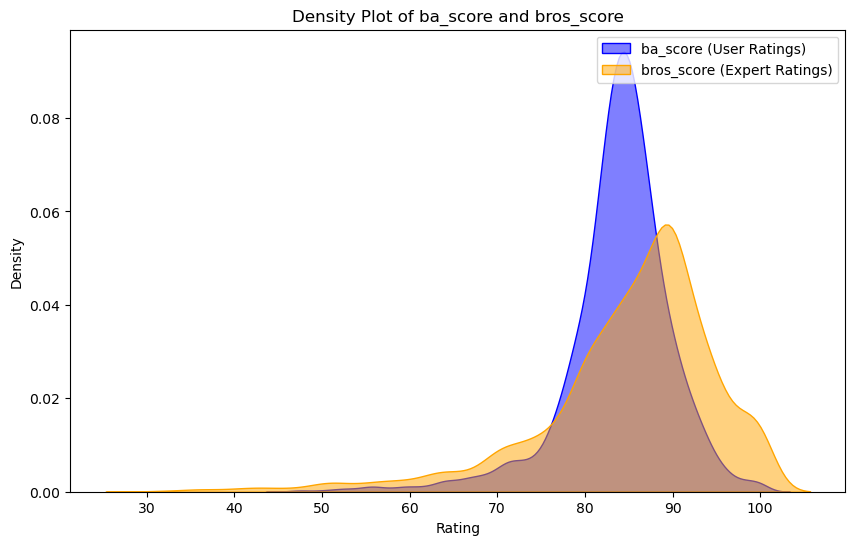

In [18]:
from scipy.stats import pearsonr
ba_beers_babro = ba_beers.dropna(subset=['ba_score', 'bros_score'])

# Calculate the Pearson correlation between ba_score and bros_score
correlation, p_value = pearsonr(ba_beers_babro['ba_score'], ba_beers_babro['bros_score'])
print(f"Pearson correlation between ba_score and bros_score: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

plt.figure(figsize=(10, 6))
sns.kdeplot(ba_beers_babro['ba_score'], label='ba_score (User Ratings)', fill=True, color="blue", alpha=0.5)
sns.kdeplot(ba_beers_babro['bros_score'], label='bros_score (Expert Ratings)', fill=True, color="orange", alpha=0.5)
plt.title("Density Plot of ba_score and bros_score")
plt.xlabel("Rating")
plt.legend()
plt.show()

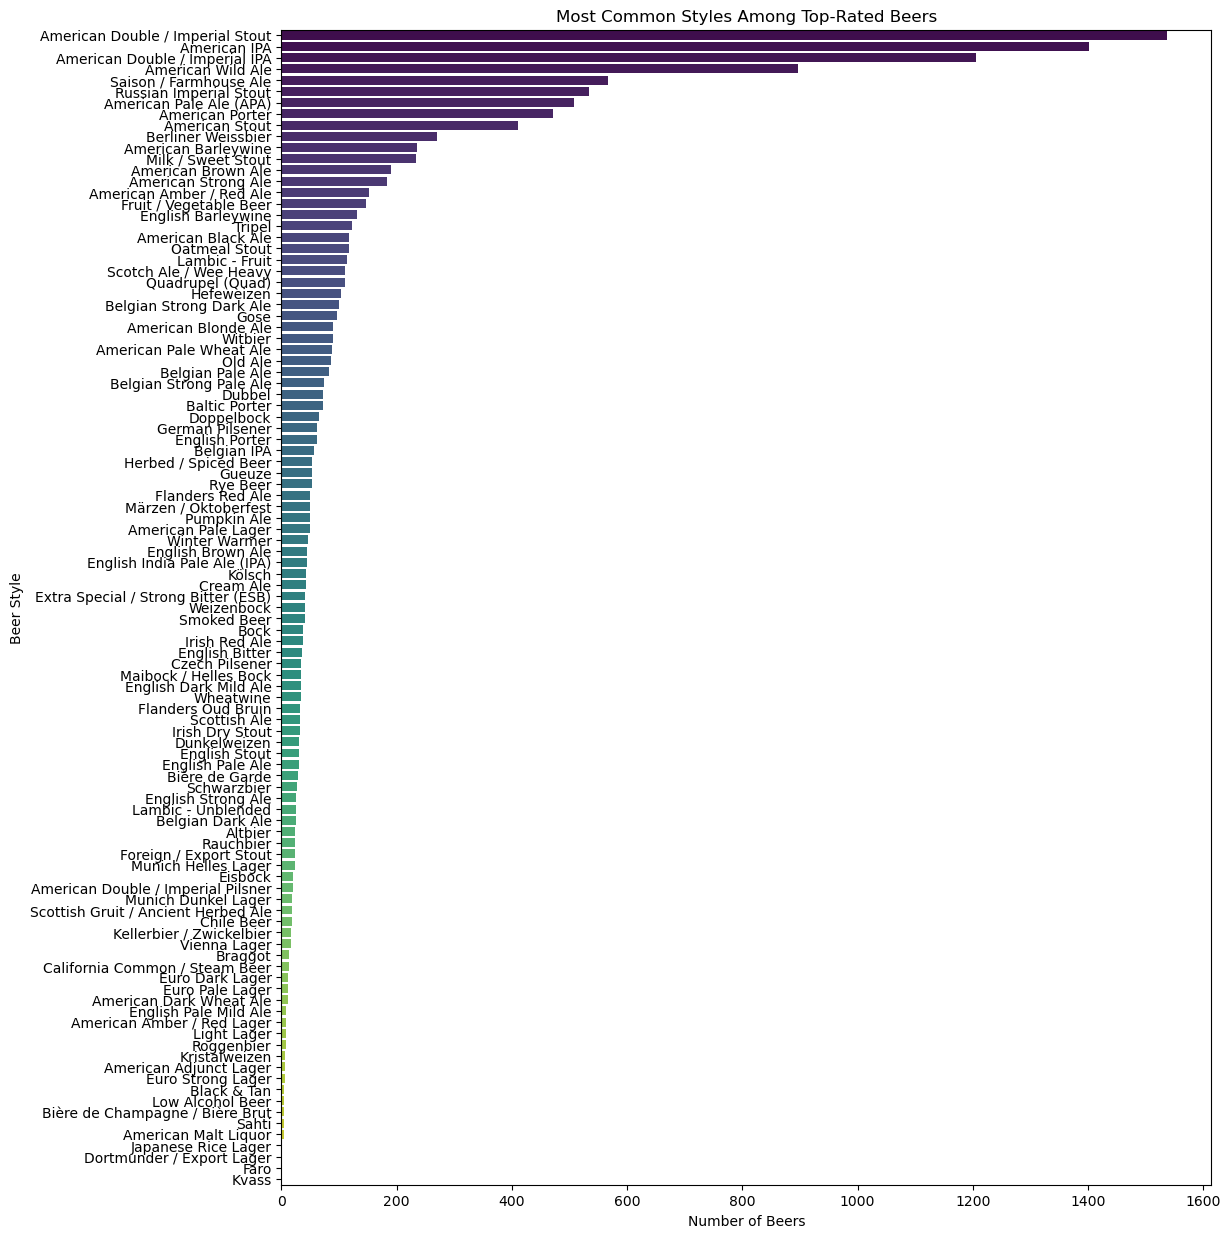


Top 5% Most Common Styles:
 style
American Double / Imperial Stout    1537
American IPA                        1401
American Double / Imperial IPA      1205
American Wild Ale                    896
Saison / Farmhouse Ale               567
Russian Imperial Stout               534
American Pale Ale (APA)              508
American Porter                      472
American Stout                       411
Berliner Weissbier                   271
Name: count, dtype: int64


In [19]:
#The code identifies the top 5% of beers by setting a rating threshold (top_rated_threshold). 
top_rated_threshold = ba_beers['avg_computed'].quantile(0.95)
top_beers = ba_beers[ba_beers['avg_computed'] >= top_rated_threshold]

style_counts = top_beers['style'].value_counts()

plt.figure(figsize=(12, 15))
sns.barplot(x=style_counts.values, y=style_counts.index, hue=style_counts.index, palette="viridis")
plt.title("Most Common Styles Among Top-Rated Beers")
plt.xlabel("Number of Beers")
plt.ylabel("Beer Style")
plt.show()

print("\nTop 5% Most Common Styles:\n", style_counts.head(10))


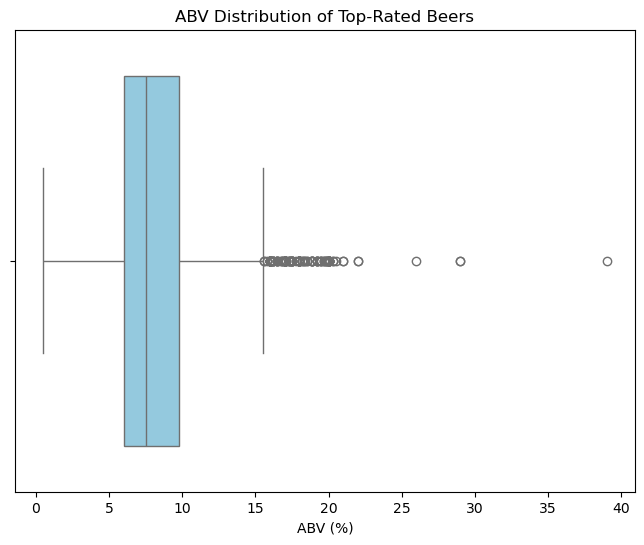

In [20]:
# alcohol analysis
abv_stats = top_beers['abv'].describe()
plt.figure(figsize=(8, 6))
sns.boxplot(x=top_beers['abv'], color="skyblue")
plt.title("ABV Distribution of Top-Rated Beers")
plt.xlabel("ABV (%)")
plt.show()

C:\Users\pierr\AppData\Local\Temp\ipykernel_21192\3342846994.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




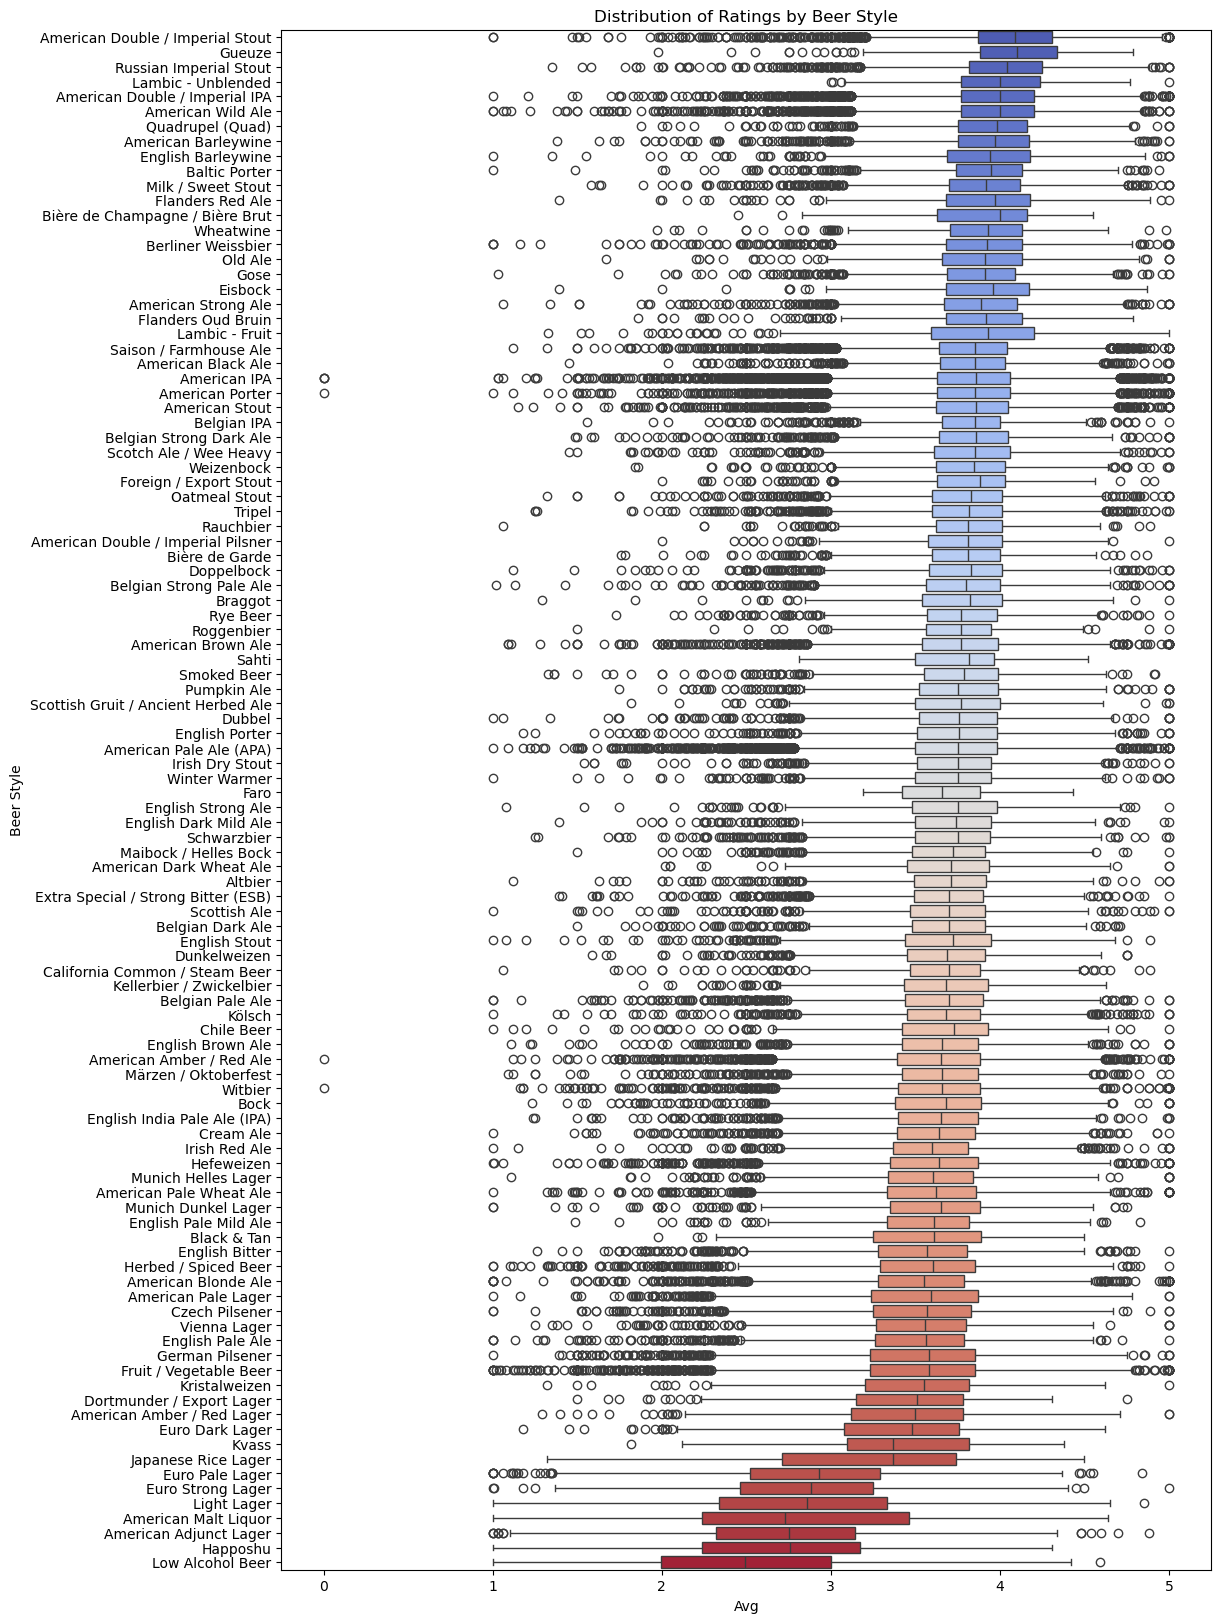

In [21]:
ba_beers_cleaned_nona = ba_beers.dropna(subset=['style', 'avg_computed'])

# Calculate the average ratings by style
style_avg_ratings = ba_beers_cleaned_nona.groupby('style')['avg'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 20))
sns.boxplot(data=ba_beers_cleaned_nona, x='avg', y='style', order=style_avg_ratings.index, palette="coolwarm")
plt.title("Distribution of Ratings by Beer Style")
plt.xlabel("Avg")
plt.ylabel("Beer Style")
plt.show()

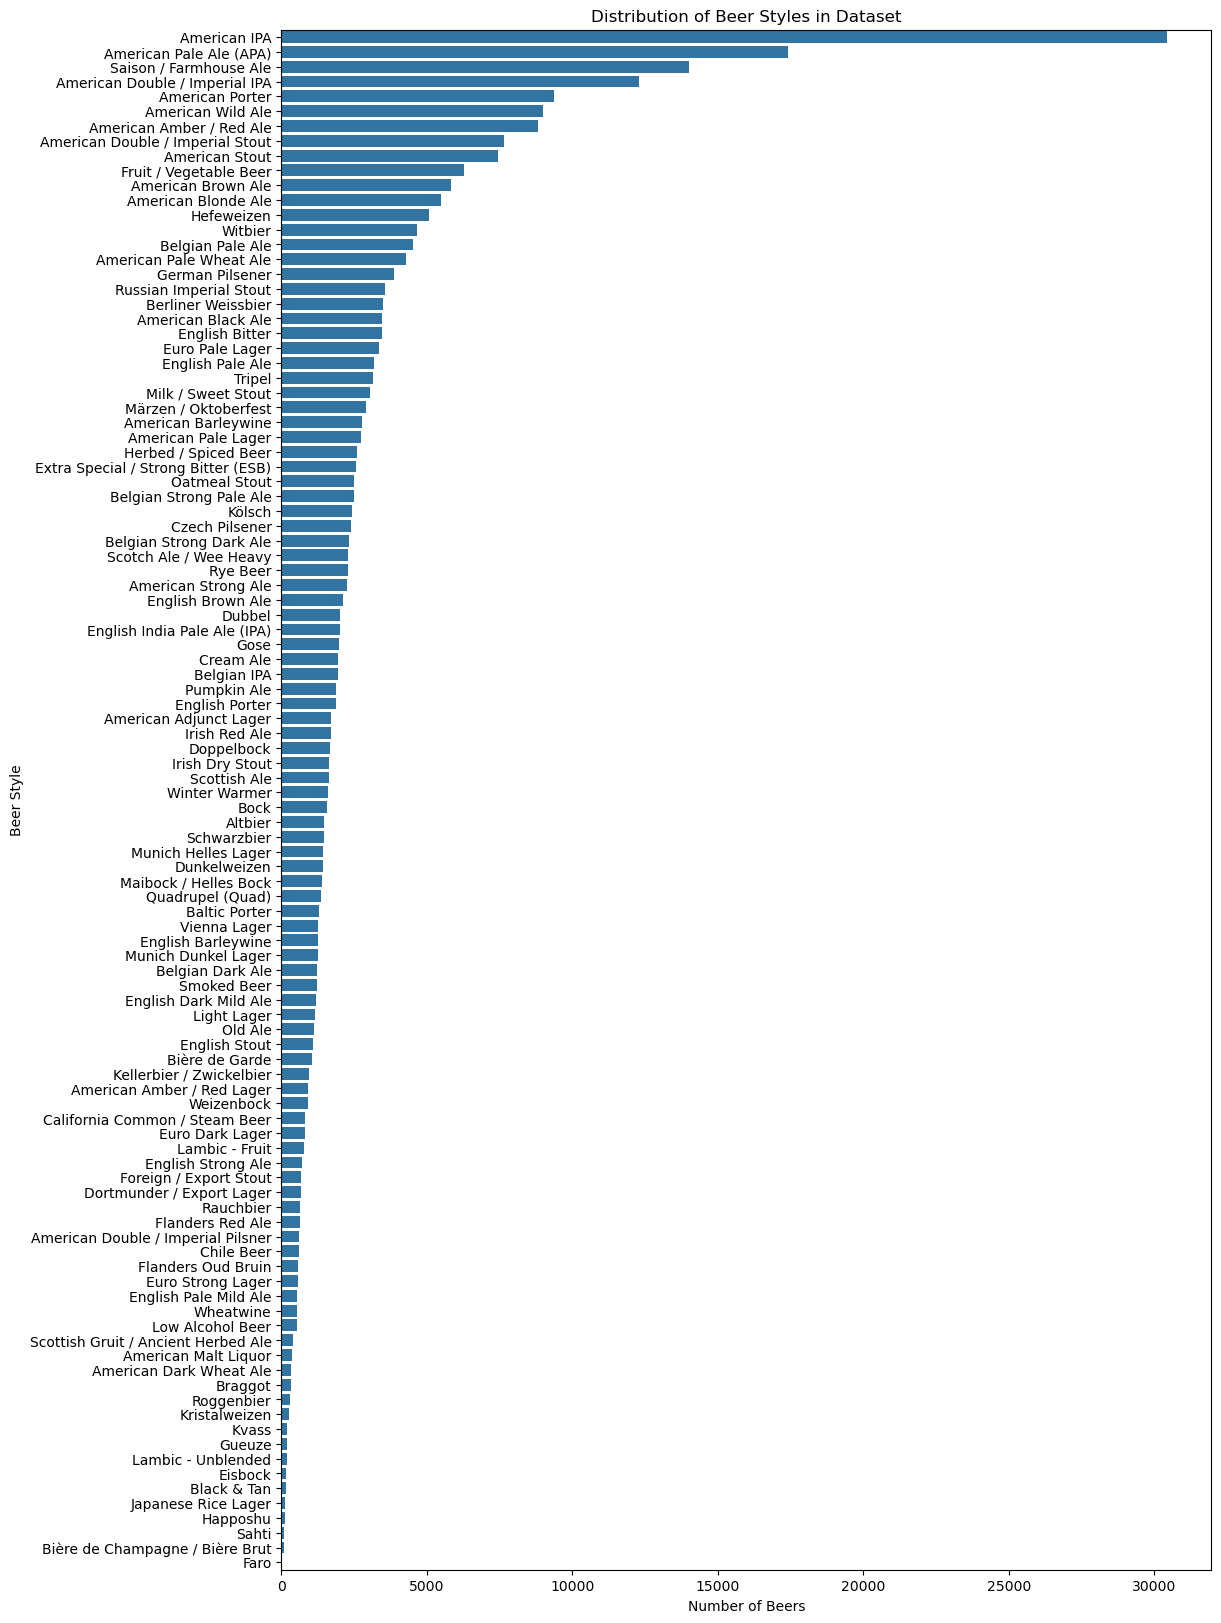

Top 10 Most Common Beer Styles:
 style
American IPA                        30433
American Pale Ale (APA)             17419
Saison / Farmhouse Ale              14006
American Double / Imperial IPA      12279
American Porter                      9377
American Wild Ale                    8994
American Amber / Red Ale             8830
American Double / Imperial Stout     7648
American Stout                       7430
Fruit / Vegetable Beer               6263
Name: count, dtype: int64


In [22]:
style_counts = ba_beers['style'].value_counts()

# Visualize the distribution of beer styles
plt.figure(figsize=(12, 20))
sns.barplot(x=style_counts.values, y=style_counts.index)
plt.title("Distribution of Beer Styles in Dataset")
plt.xlabel("Number of Beers")
plt.ylabel("Beer Style")
plt.show()

print("Top 10 Most Common Beer Styles:\n", style_counts.head(10))


In [23]:
#Identify breweries with the highest avg scores or nbr_ratings
ba_brewery = ba_beers.dropna(subset=['brewery_id', 'avg_computed', 'nbr_ratings'])

brewery_stats = ba_brewery.groupby('brewery_id').agg(
    avg_score=('avg_computed', 'mean'),
    total_ratings=('nbr_ratings', 'sum')
).reset_index()

top_breweries_by_score = brewery_stats.sort_values(by='avg_score', ascending=False).head(10)

# trouver top 10 breweries by total number of ratings
top_breweries_by_ratings = brewery_stats.sort_values(by='total_ratings', ascending=False).head(10)

print("Top 10 Breweries by Average Score:")
print(top_breweries_by_score)

print("\nTop 10 Breweries by Number of Ratings:")
print(top_breweries_by_ratings)


Top 10 Breweries by Average Score:
       brewery_id  avg_score  total_ratings
8481        34425     5.0000              8
10863       42367     5.0000              1
11017       42809     5.0000              1
13434       49218     4.9600              1
9386        37259     4.9500              1
11730       44630     4.9450              2
837          1061     4.9400              1
12760       47363     4.9100              1
13139       48440     4.8975              8
13059       48210     4.8950              2

Top 10 Breweries by Number of Ratings:
     brewery_id  avg_score  total_ratings
116         147   3.947895         165752
109         140   3.882140         165465
895        1199   3.943232         149686
28           35   3.608590         147500
51           64   3.851174         147416
226         287   3.860495         111502
182         220   3.922305         109427
875        1146   3.880957         108243
21           26   3.987581          95653
154         192   3.8

In [24]:
#Count the unique styles each brewery produces (maybe see if breweries 
#with broader style offerings have higher scores.)

# Count unique styles per brewery and calculate average score
brewery_style_stats = ba_brewery.groupby('brewery_id').agg(
    num_styles=('style', 'nunique')   
).reset_index()

brewery_style_stats = brewery_style_stats.sort_values(by='num_styles', ascending=False)

print("Breweries with Broad Style Offerings ")
print(brewery_style_stats.head(10))


Breweries with Broad Style Offerings 
      brewery_id  num_styles
2482        6045          89
1062        1550          89
875         1146          85
10            12          84
28            35          81
4693       17981          81
6151       26850          77
3187        9629          77
109          140          76
889         1177          76


Pearson correlation between nbr_reviews and avg score: 0.03
P-value: 8.12e-51


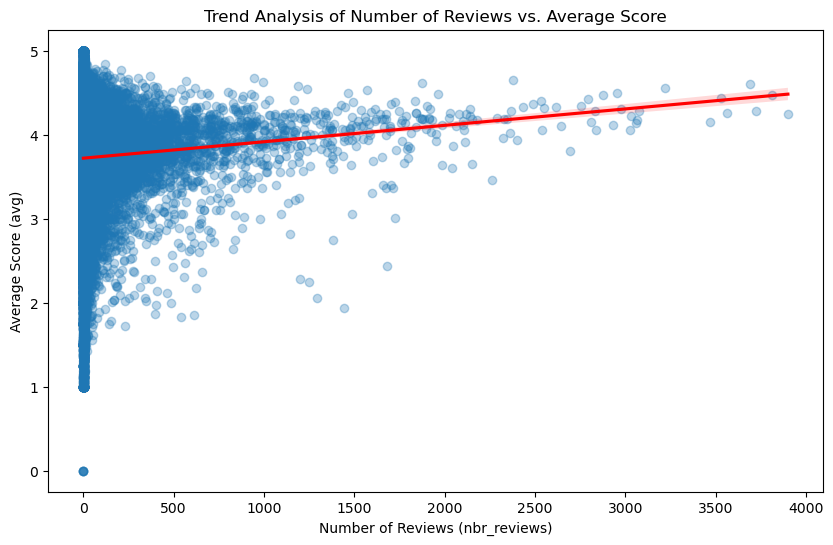

In [25]:
#Investigate if beers with more nbr_reviews tend to have higher or lower avg scores. 

df = ba_beers.dropna(subset=['nbr_reviews', 'avg_computed'])

# Calculate the Pearson correlation between nbr_reviews and avg score
correlation, p_value = pearsonr(df['nbr_reviews'], df['avg'])
print(f"Pearson correlation between nbr_reviews and avg score: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

plt.figure(figsize=(10, 6))
sns.regplot(x='nbr_reviews', y='avg', data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title("Trend Analysis of Number of Reviews vs. Average Score")
plt.xlabel("Number of Reviews (nbr_reviews)")
plt.ylabel("Average Score (avg)")
plt.show()


Average Number of Reviews per Style:
                     style  avg_nbr_reviews
0                   Gueuze        51.198020
1                     Faro        30.178571
2   Russian Imperial Stout        22.603419
3  Belgian Strong Dark Ale        21.493557
4         Quadrupel (Quad)        21.294636
5           Lambic - Fruit        21.156489
6   American Adjunct Lager        21.100523
7                  Old Ale        19.440860
8                  Eisbock        19.318436
9      American Strong Ale        18.471244


C:\Users\pierr\AppData\Local\Temp\ipykernel_21192\2021784125.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




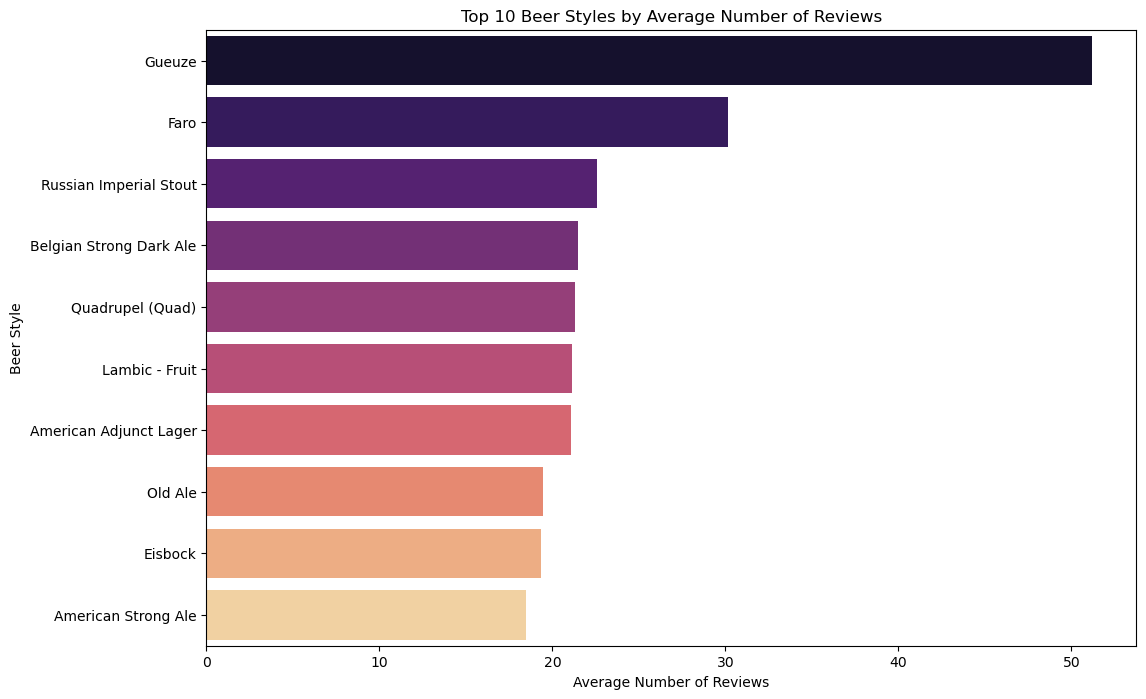

In [26]:
#Investigate average number of review per style (to see later if beers with more nbr_reviews tend to have higher or lower avg scores)
ba_nbr_style = ba_beers.dropna(subset=['style', 'nbr_reviews'])

style_avg_reviews = ba_nbr_style.groupby('style')['nbr_reviews'].mean().sort_values(ascending=False).reset_index()

style_avg_reviews.columns = ['style', 'avg_nbr_reviews']

print("Average Number of Reviews per Style:")
print(style_avg_reviews.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(data=style_avg_reviews.head(10), x='avg_nbr_reviews', y='style', palette="magma")
plt.title("Top 10 Beer Styles by Average Number of Reviews")
plt.xlabel("Average Number of Reviews")
plt.ylabel("Beer Style")
plt.show()

# RateBeer

## beers.csv

In [27]:
unique_style = rb_beers.groupby('style').agg(nbr_beers= ('beer_id', 'count'),
                                             nbr_ratings_sum= ('nbr_ratings', 'sum'),
                                             nbr_ratings_mean= ('nbr_ratings', 'mean'),
                                             overall_score_mean= ('overall_score', 'mean'),
                                             style_score_mean= ('style_score', 'mean'),
                                             avg_mean= ('avg', 'mean'),
                                             abv_mean= ('abv', 'mean'),
                                             avg_computed_mean= ('avg_computed', 'mean')).reset_index()
display(unique_style)

style  nbr_beers  nbr_ratings_sum  nbr_ratings_mean  \
0              Abbey Dubbel       3004            71944         23.949401   
1              Abbey Tripel       3905           116602         29.859667   
2             Abt/Quadrupel       1565            66277         42.349521   
3                   Altbier       2094            29403         14.041547   
4                 Amber Ale      11664           138788         11.898834   
..                      ...        ...              ...               ...   
89          Traditional Ale       1894            36442         19.240760   
90              Weizen Bock       1586            32605         20.558008   
91                Wheat Ale       7234            78242         10.815870   
92                  Witbier       6514           107243         16.463463   
93  Zwickel/Keller/Landbier       2703            45368         16.784314   

    overall_score_mean  style_score_mean  avg_mean   abv_mean  \
0            58.072780         53.430859  3.041823   7.323595   
1            63.430689         54.256321  3.106314   8.817297   
2            82.398747         54.540710  3.245603  10.651311   
3            50.379717         55.570755  2.987792   5.491802   
4            45.494697         56.181162  2.966306   5.515832   
..                 ...               ...       ...        ...   
89           46.704545         52.926573  2.973348   5.606781   
90           65.340230         54.360920  3.094164   7.468877   
91           43.331621         59.139398  2.943141   5.215630   
92           45.470946         55.807432  2.974411   5.171283   
93           40.518408         55.618905  2.963987   5.034320   

    avg_computed_mean  
0            3.297268  
1            3.350143  
2            3.566131  
3            3.199474  
4            3.143169  
..                ...  
89           3.131562  
90           3.358549  
91           3.117615  
92           3.139028  
93           3.065623  

[94 rows x 9 columns]

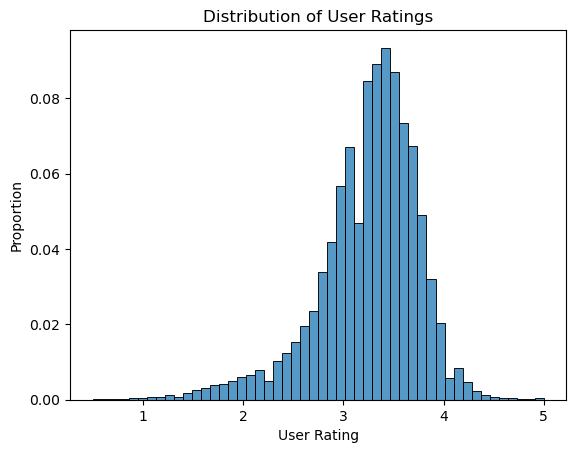

In [28]:
sns.histplot(rb_beers['avg_computed'], bins=50, stat='proportion')
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Proportion')
plt.show()

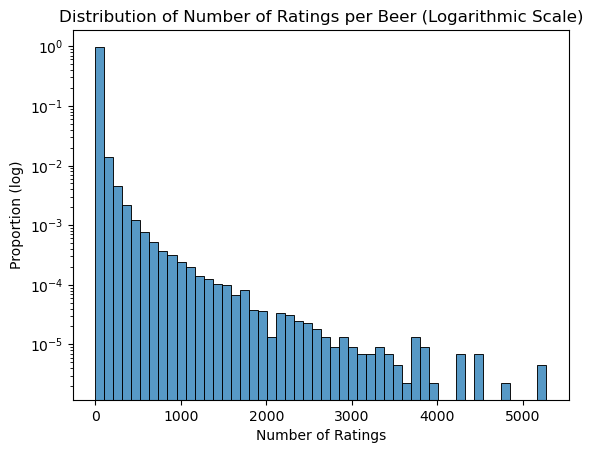

In [29]:
sns.histplot(rb_beers['nbr_ratings'], bins=50, stat='proportion')
plt.yscale('log')
plt.title('Distribution of Number of Ratings per Beer (Logarithmic Scale)')
plt.xlabel('Number of Ratings')
plt.ylabel('Proportion (log)')
plt.show()

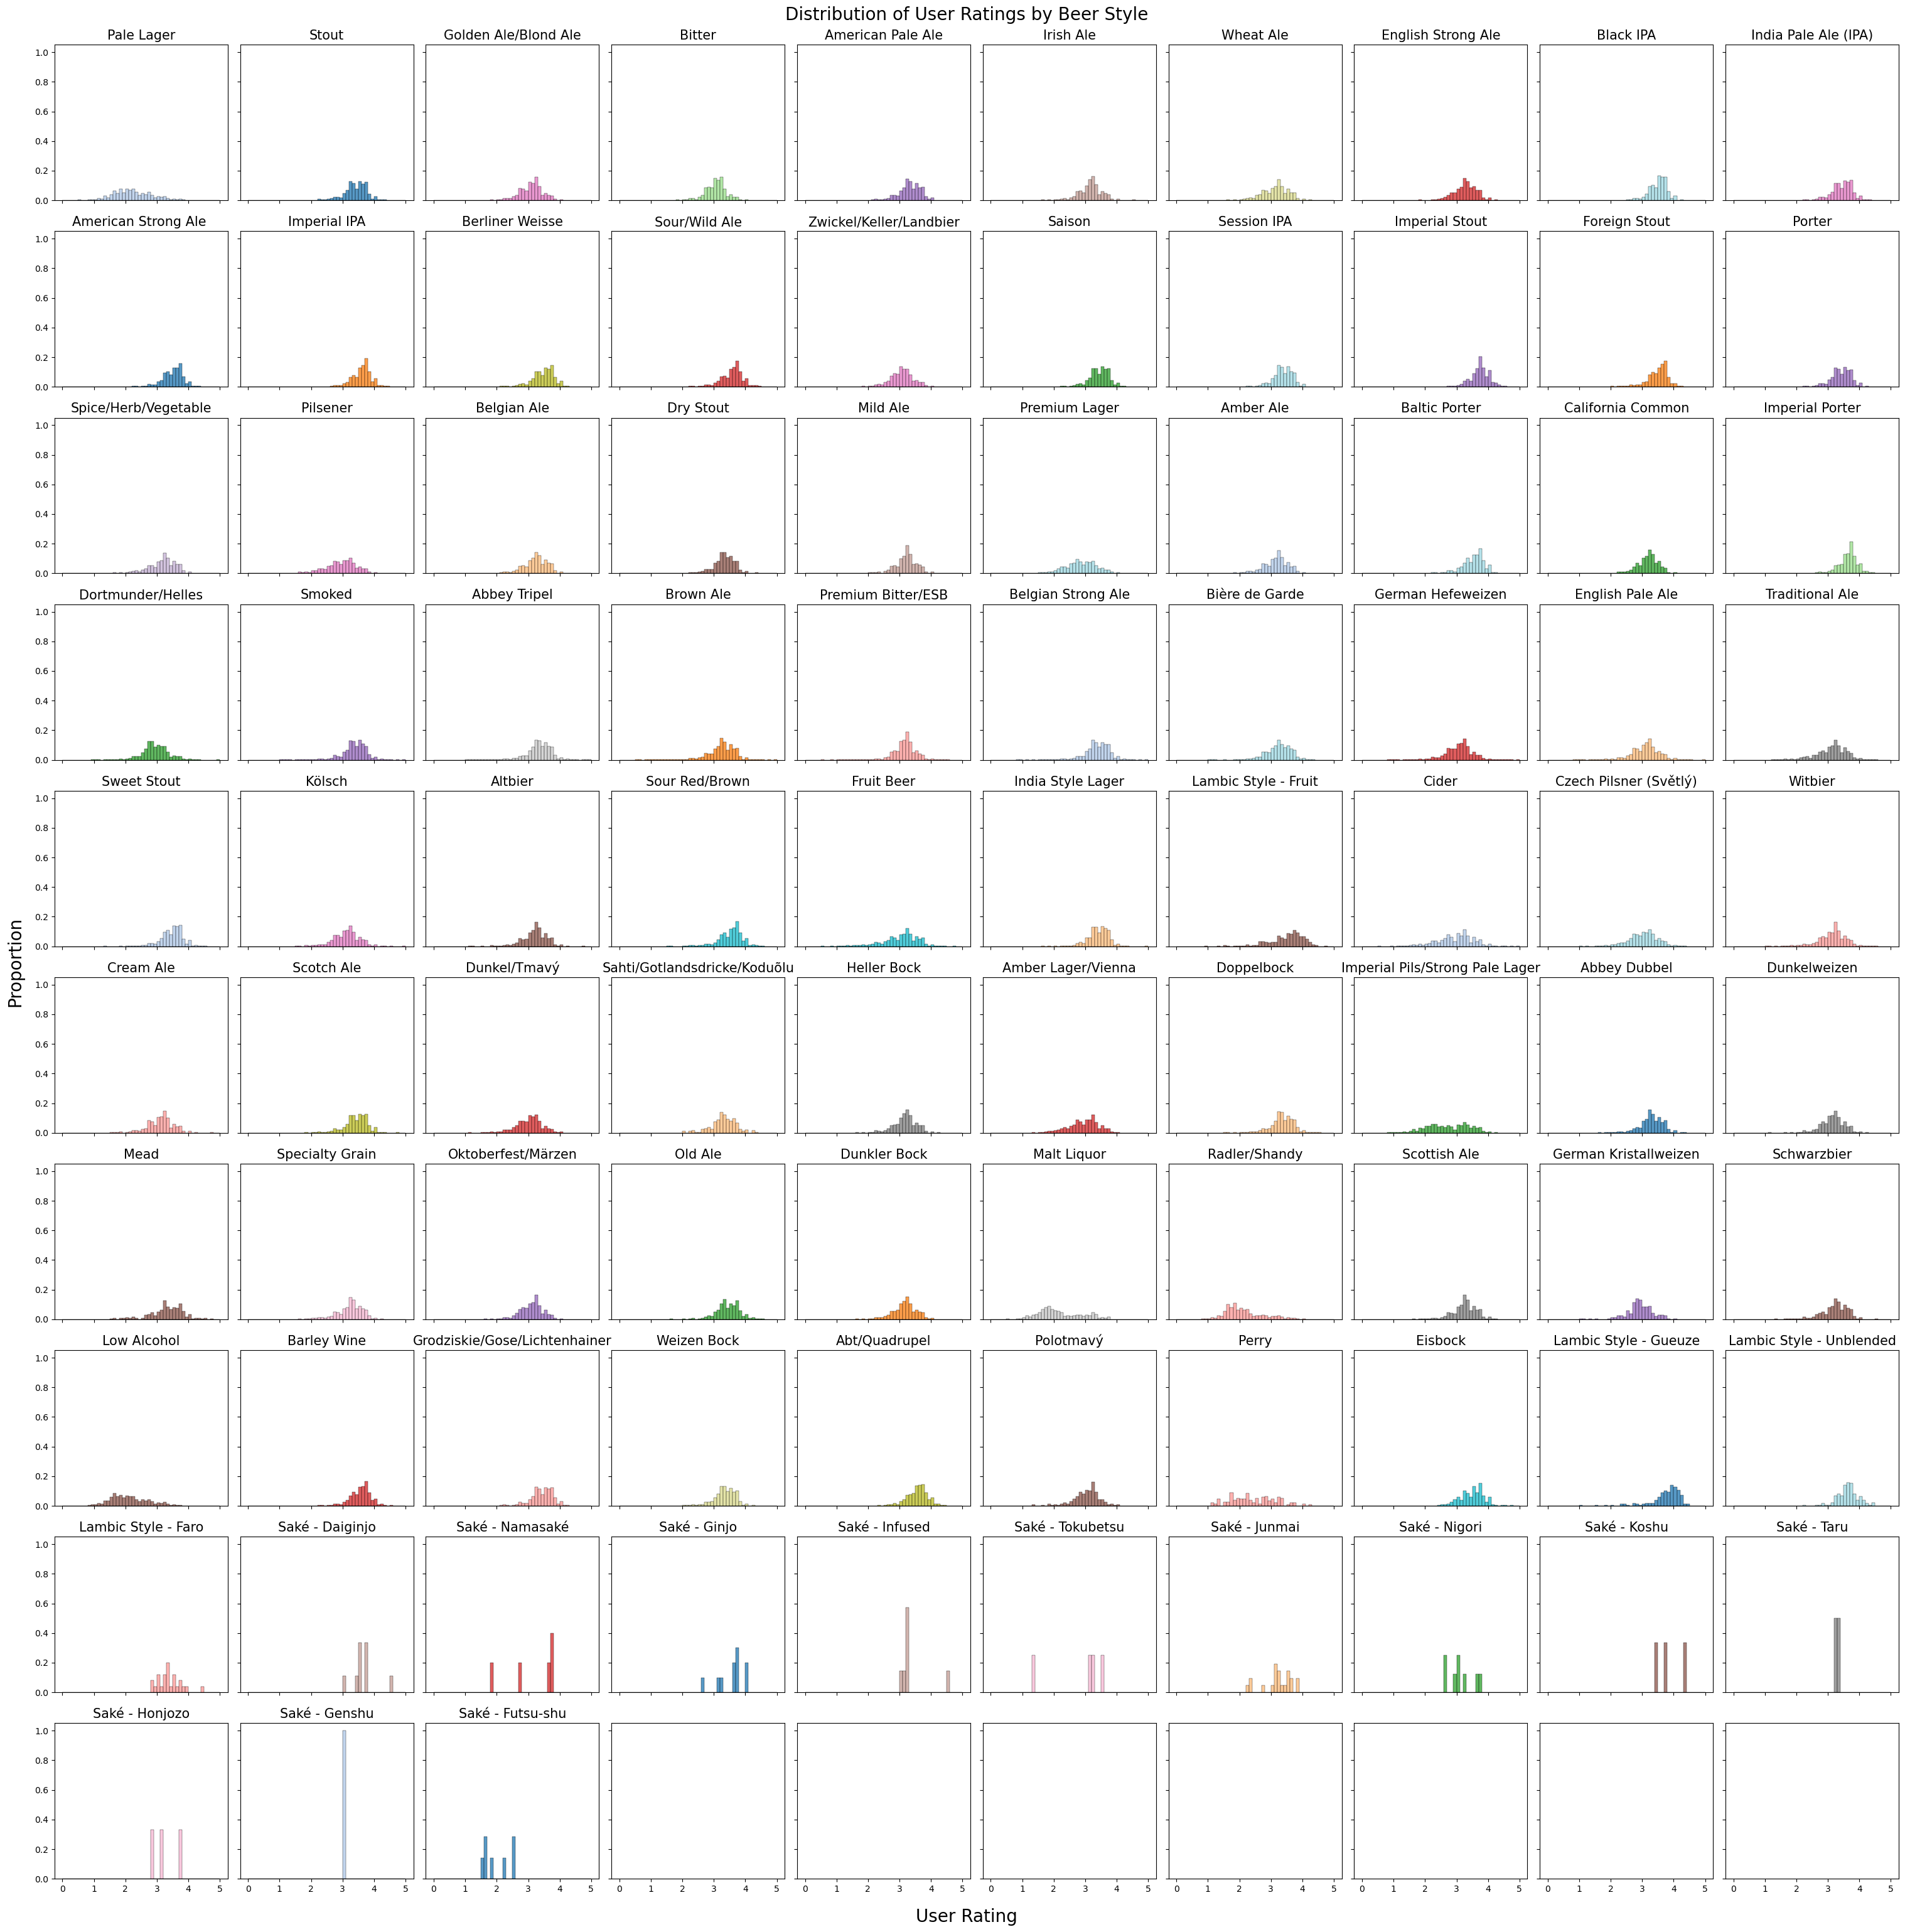

In [30]:
fig, axs = plt.subplots(10, 10, figsize=(30, 30), sharex=True, sharey=True)
cmap = plt.get_cmap('tab20')
i, j = 0, 0

for idx, name in enumerate(rb_beers['style'].unique()):
    if j == 10:
        i += 1
        j = 0
    
    style_data = rb_beers[rb_beers['style'] == name]['avg_computed'].dropna()
    color = cmap(np.random.rand())

    if not style_data.empty:
        sns.histplot(style_data, bins=50, binrange=[0, 5], ax=axs[i, j], stat='proportion', color=color)
        axs[i, j].set_title(name, fontsize=15)
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
    
    j += 1

fig.text(0.5, -0.01, 'User Rating', ha='center', fontsize=20)
fig.text(-0.01, 0.5, 'Proportion', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 1, 'Distribution of User Ratings by Beer Style', ha='center', fontsize=20)

plt.tight_layout()
plt.show()

C:\Users\pierr\AppData\Local\Temp\ipykernel_21192\3828514039.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




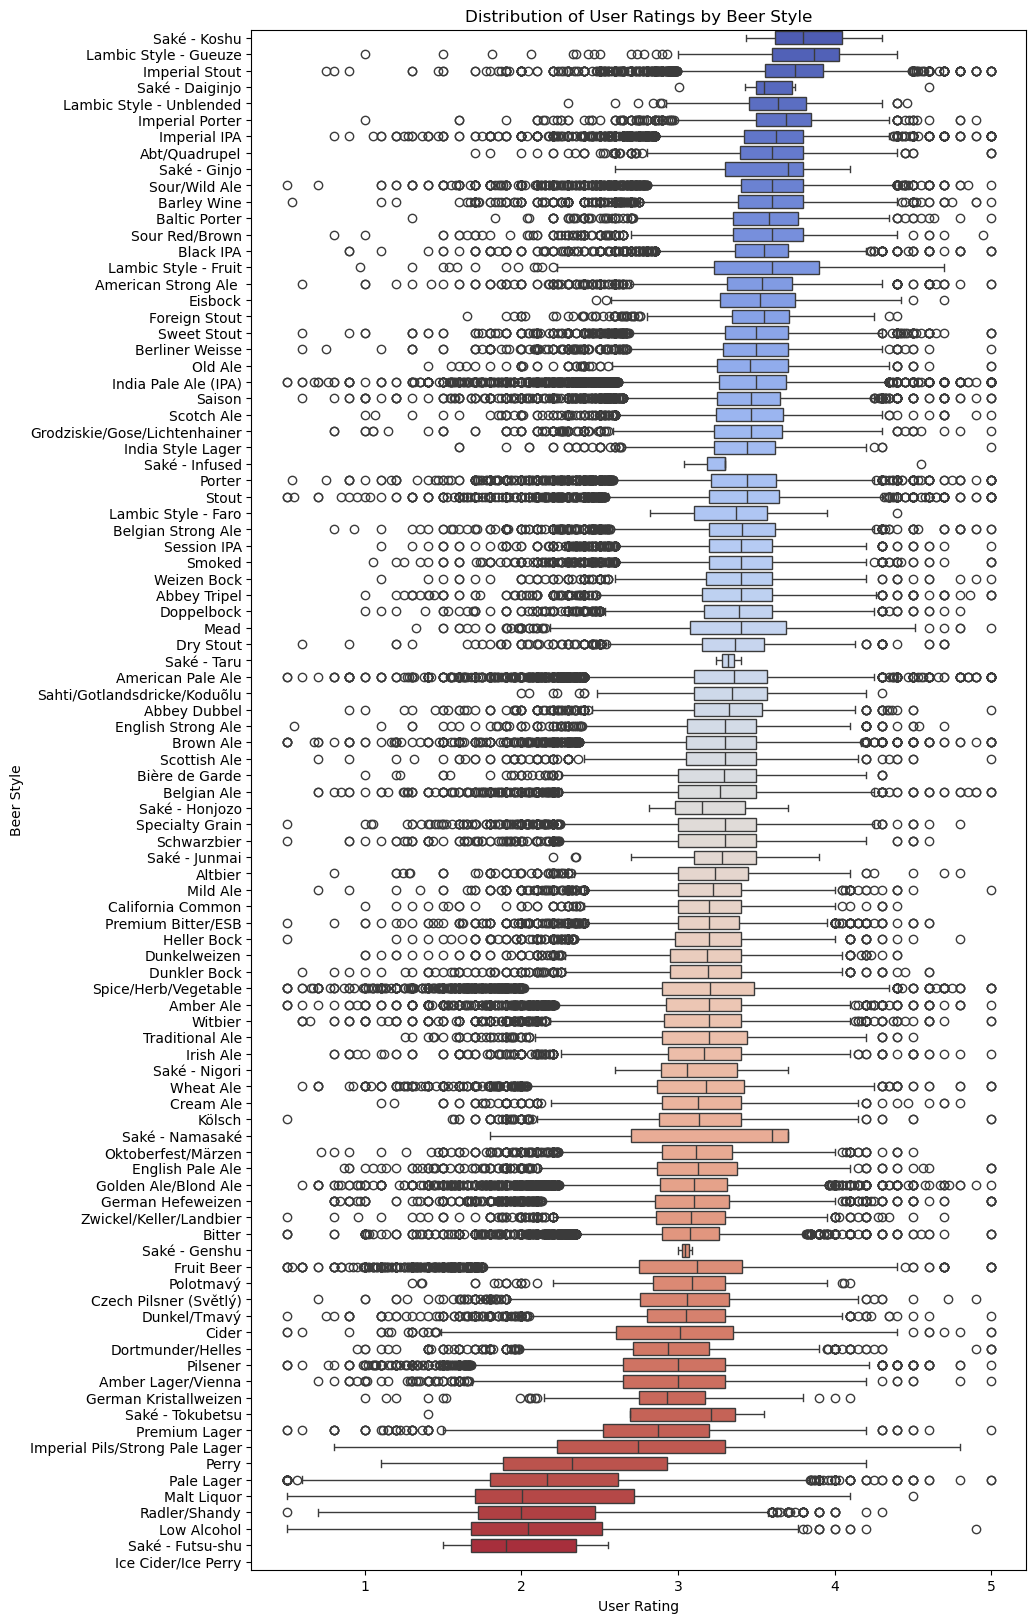

In [31]:
plt.figure(figsize=(10, 20))
sorted_styles = rb_beers.groupby('style')['avg_computed'].mean().sort_values(ascending=False).index
sns.boxplot(data=rb_beers, x='avg_computed', y='style', palette='coolwarm', order=sorted_styles)
plt.title('Distribution of User Ratings by Beer Style')
plt.xlabel('User Rating')
plt.ylabel('Beer Style')
plt.show()

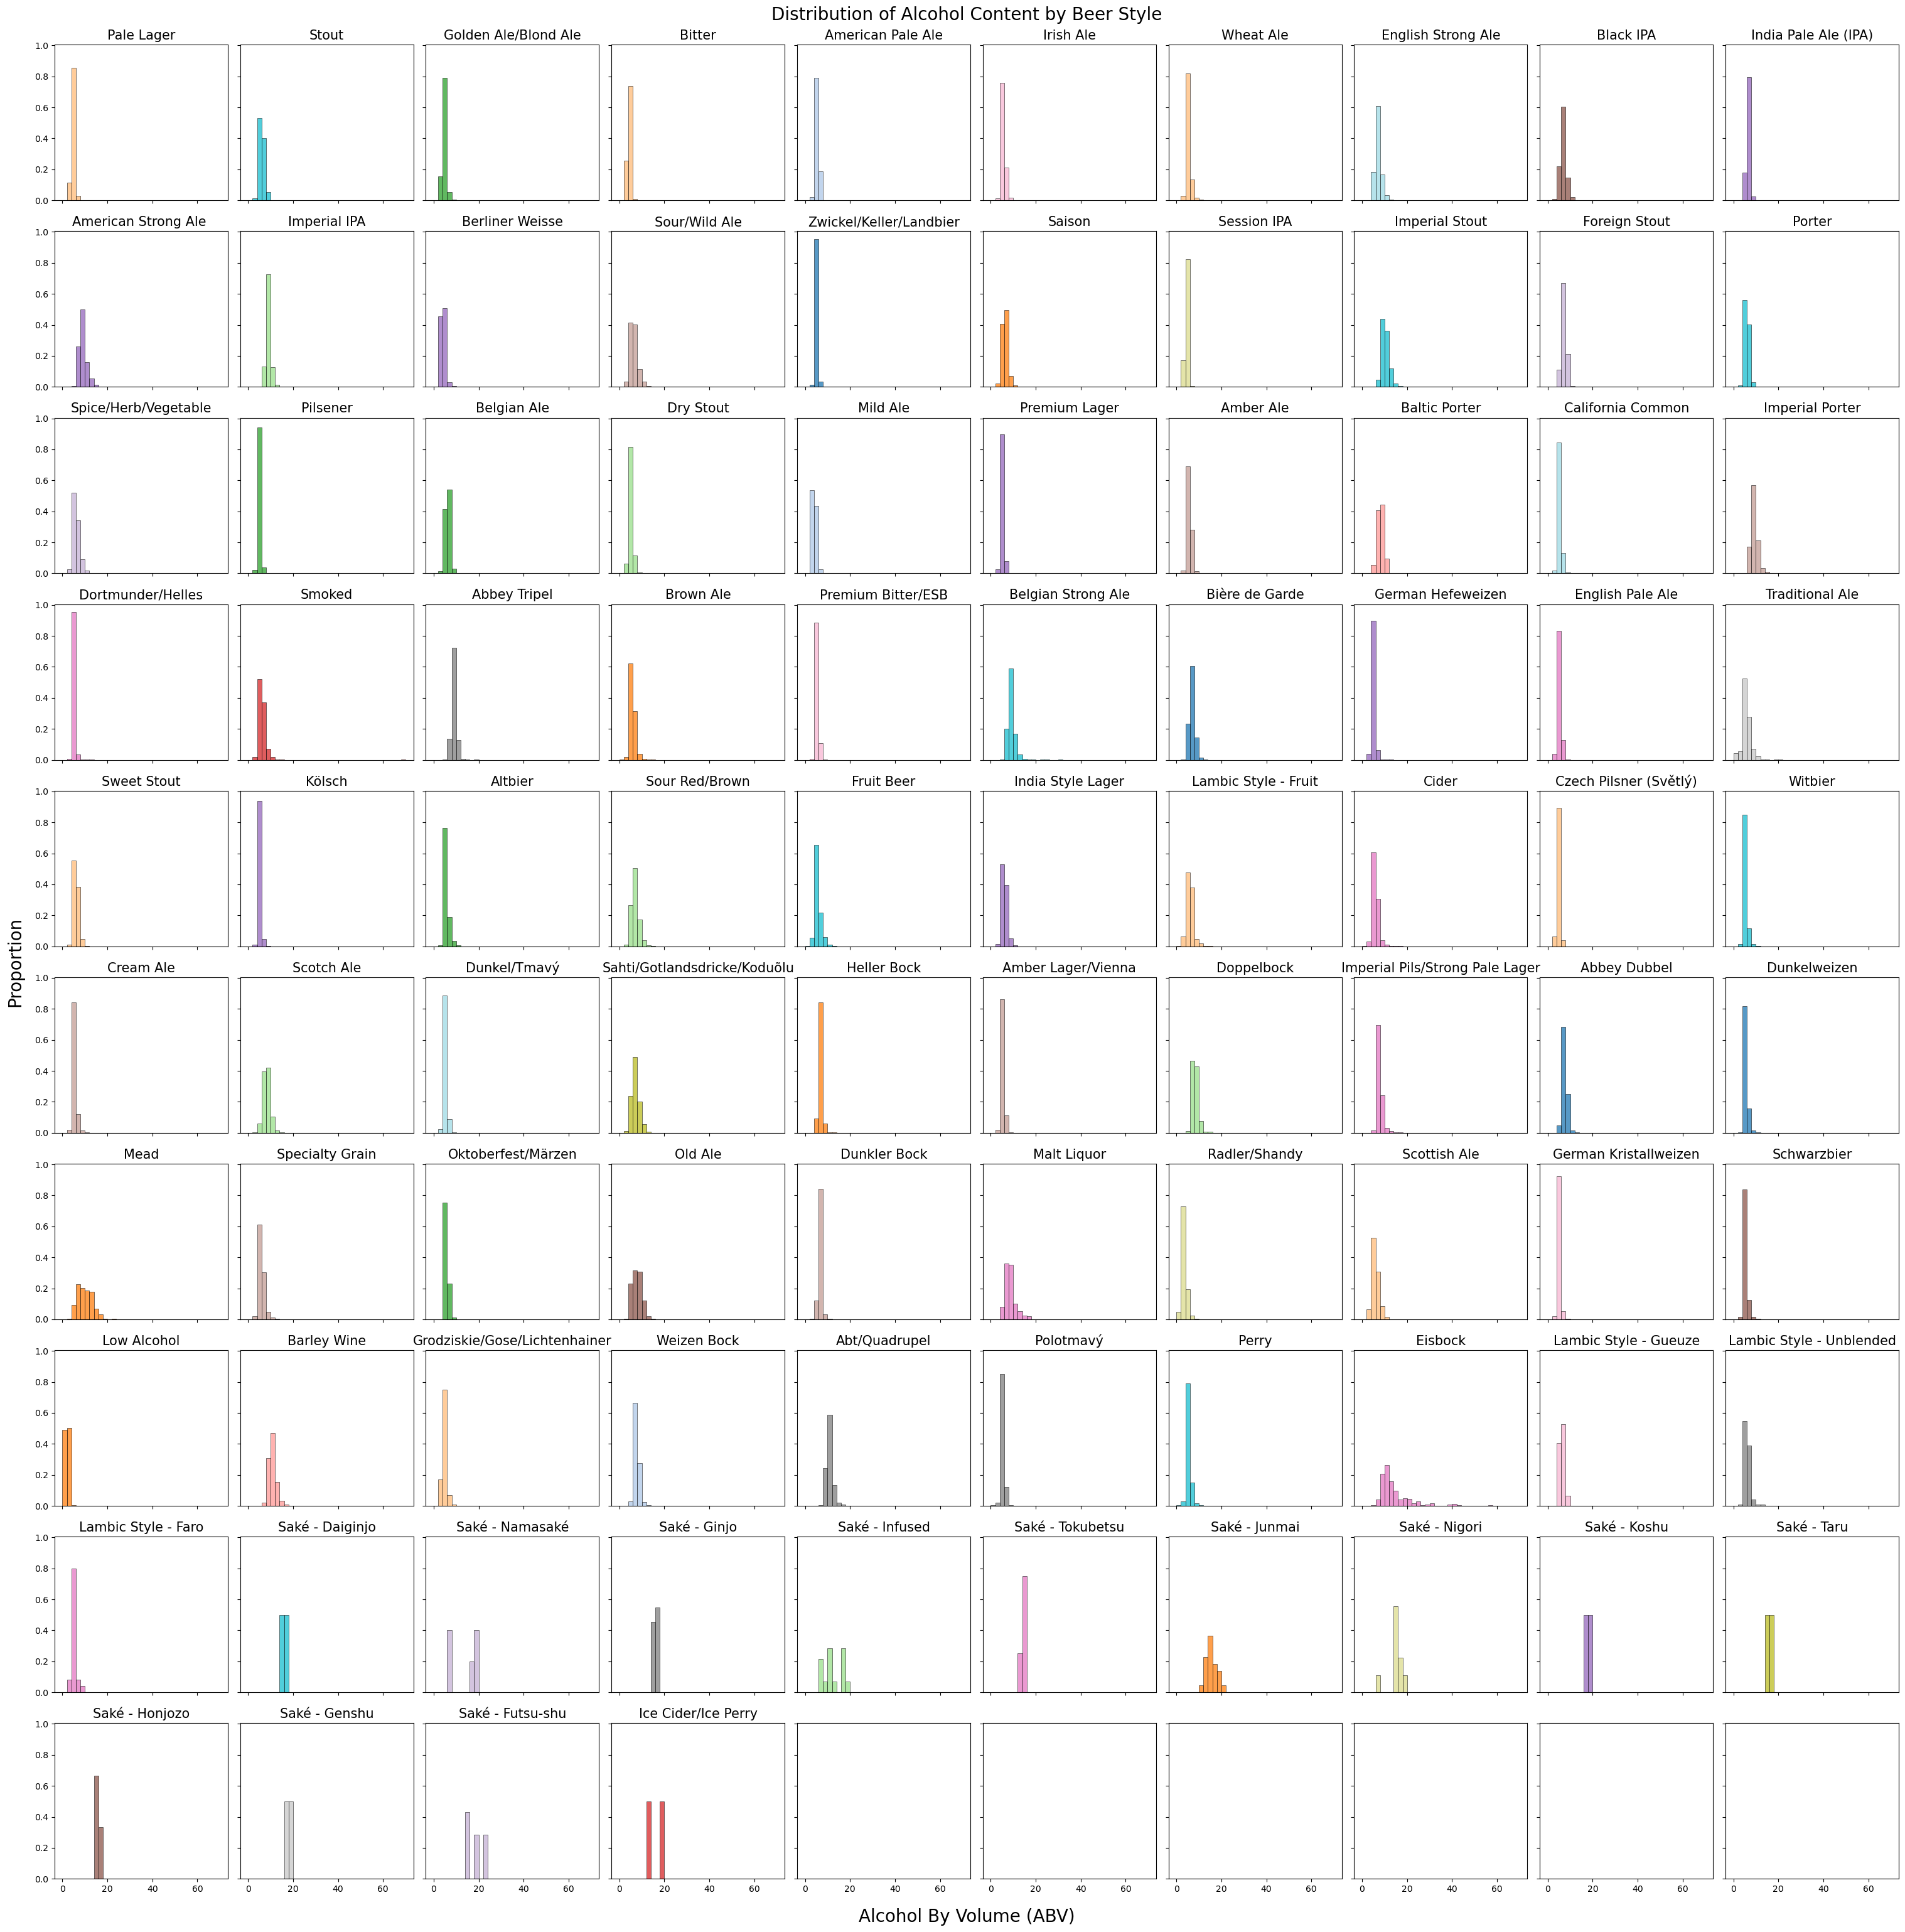

In [32]:
fig, axs = plt.subplots(10, 10, figsize=(30, 30), sharex=True, sharey=True)
cmap = plt.get_cmap('tab20')
i, j = 0, 0

for idx, name in enumerate(rb_beers['style'].unique()):
    if j == 10:
        i += 1
        j = 0
    
    style_data = rb_beers[rb_beers['style'] == name]['abv'].dropna()
    color = cmap(np.random.rand())

    if not style_data.empty:
        sns.histplot(style_data, bins=35, binrange=[0, 70], ax=axs[i, j], stat='proportion', color=color)  # 70 because Snake Venom is the highest one at 67.5%, rest is error
        axs[i, j].set_title(name, fontsize=15)
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
    
    j += 1

fig.text(0.5, -0.01, 'Alcohol By Volume (ABV)', ha='center', fontsize=20)
fig.text(-0.01, 0.5, 'Proportion', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 1, 'Distribution of Alcohol Content by Beer Style', ha='center', fontsize=20)

plt.tight_layout()
plt.show()

C:\Users\pierr\AppData\Local\Temp\ipykernel_21192\2920611329.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




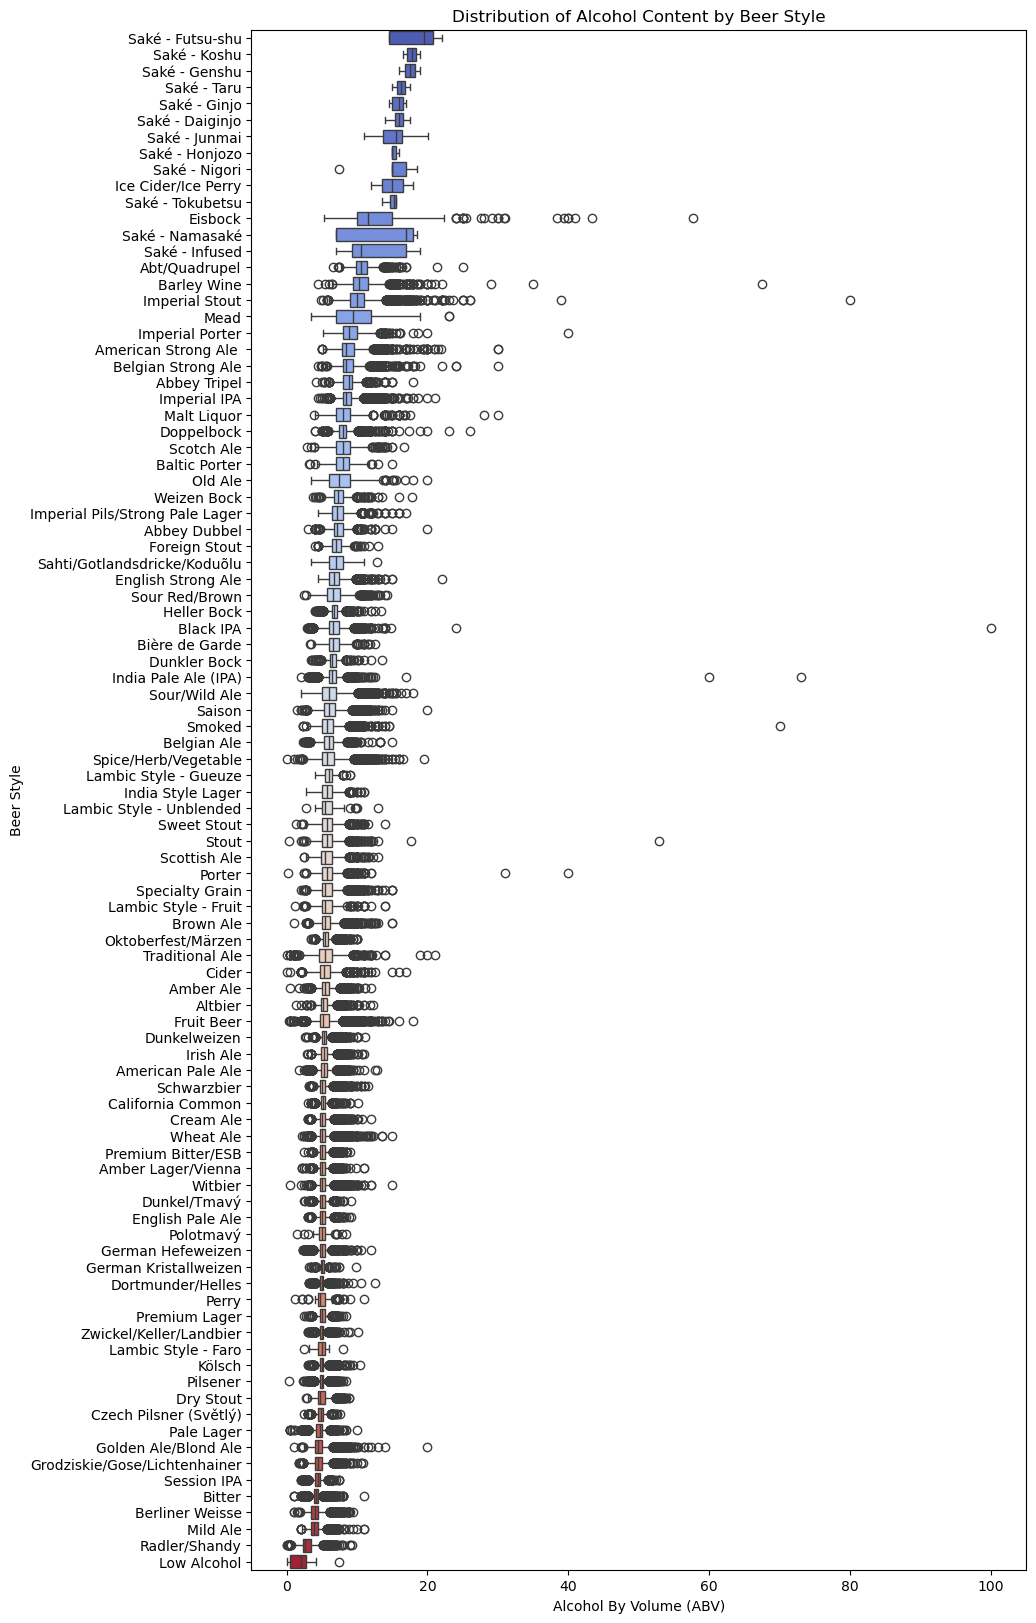

In [33]:
plt.figure(figsize=(10, 20))
sorted_styles = rb_beers.groupby('style')['abv'].mean().sort_values(ascending=False).index
sns.boxplot(data=rb_beers, x='abv', y='style', palette='coolwarm', order=sorted_styles)
plt.title('Distribution of Alcohol Content by Beer Style')
plt.xlabel('Alcohol By Volume (ABV)')
plt.ylabel('Beer Style')
plt.show()

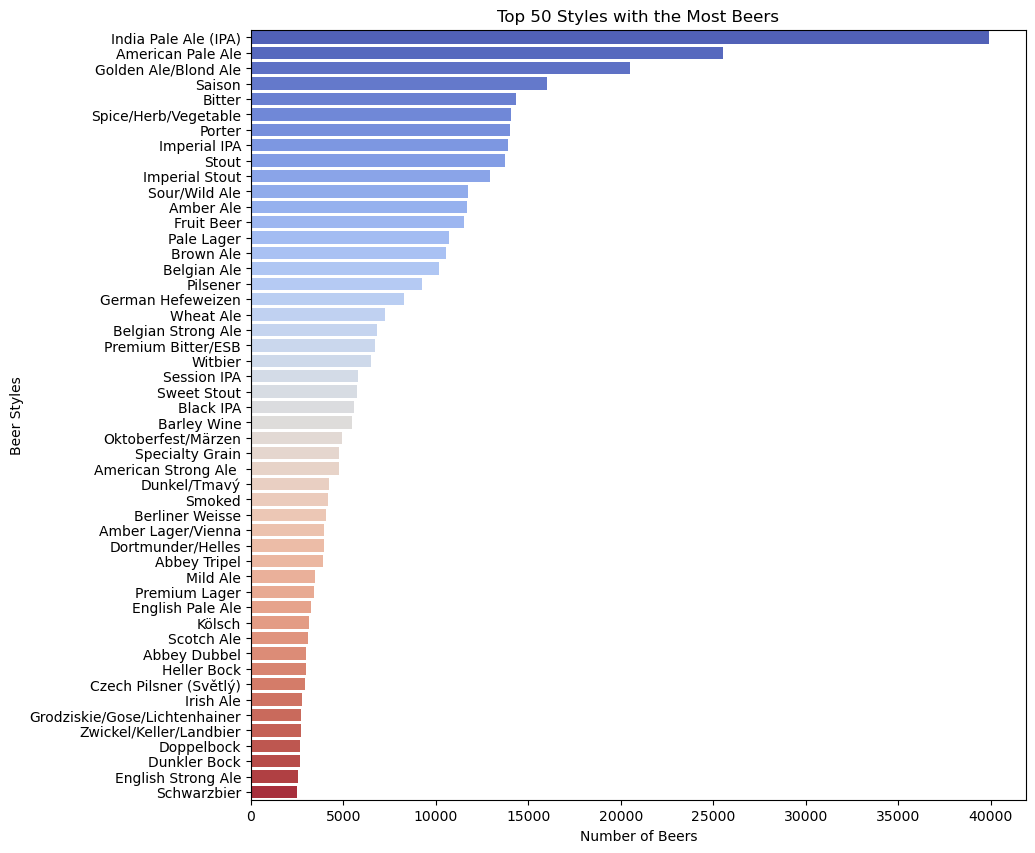

In [34]:
plt.figure(figsize=(10, 10))
top_50 = unique_style.sort_values(ascending=False, by='nbr_beers').head(50)
sns.barplot(data=top_50, x='nbr_beers', y='style', hue='style', palette='coolwarm')
plt.title('Top 50 Styles with the Most Beers')
plt.xlabel('Number of Beers')
plt.ylabel('Beer Styles')
plt.show()

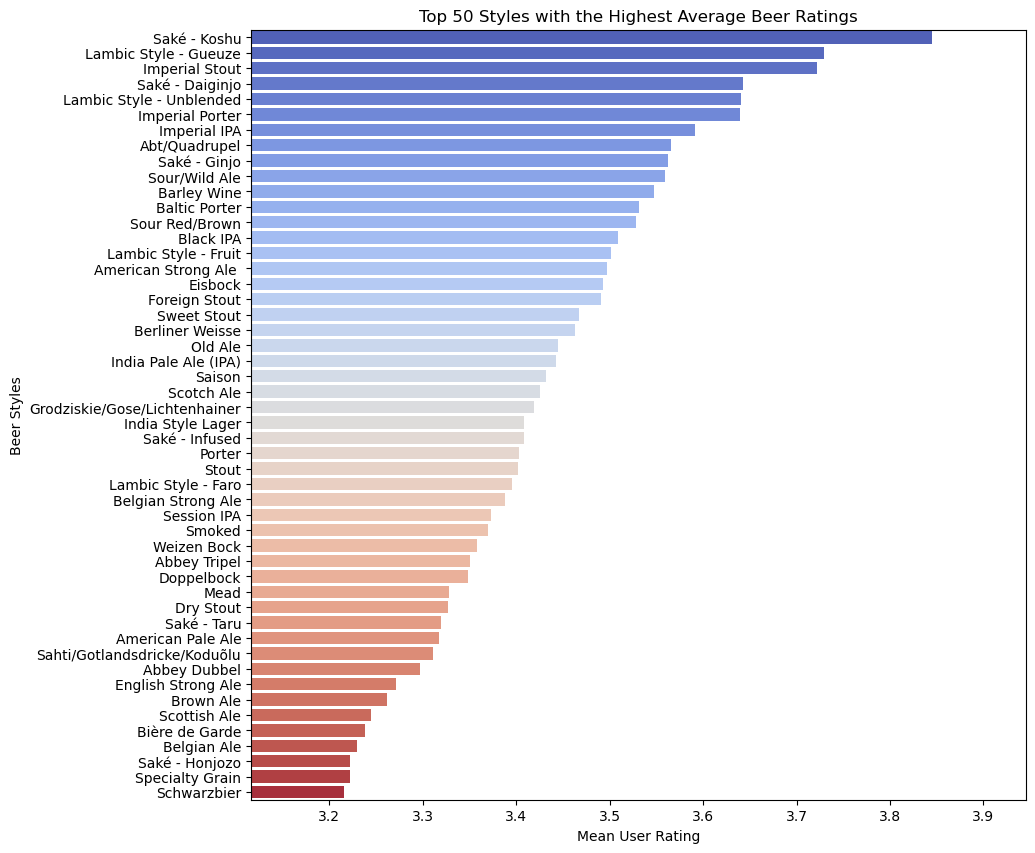

In [35]:
plt.figure(figsize=(10, 10))
top_50 = unique_style.sort_values(ascending=False, by='avg_computed_mean').head(50)
min_top_50 = min(top_50['avg_computed_mean'])
max_top_50 = max(top_50['avg_computed_mean'])
sns.barplot(data=top_50, x='avg_computed_mean', y='style', hue='style', palette='coolwarm')
plt.xlim(min_top_50 - 0.1, max_top_50 + 0.1)
plt.title('Top 50 Styles with the Highest Average Beer Ratings')
plt.xlabel('Mean User Rating')
plt.ylabel('Beer Styles')
plt.show()

## breweries.csv

In [36]:
unique_brewery = rb_beers.groupby('brewery_id').agg(nbr_beers= ('beer_id', 'count'),
                                             nbr_ratings_sum= ('nbr_ratings', 'sum'),
                                             nbr_ratings_mean= ('nbr_ratings', 'mean'),
                                             overall_score_mean= ('overall_score', 'mean'),
                                             style_score_mean= ('style_score', 'mean'),
                                             avg_mean= ('avg', 'mean'),
                                             abv_mean= ('abv', 'mean'),
                                             avg_computed_mean= ('avg_computed', 'mean')).reset_index()
display(unique_brewery)

brewery_id  nbr_beers  nbr_ratings_sum  nbr_ratings_mean  \
0               1        127            12657         99.661417   
1               2         52              535         10.288462   
2               3        123             7834         63.691057   
3               4         86            10283        119.569767   
4               5         20               73          3.650000   
...           ...        ...              ...               ...   
23194       32241          1                1          1.000000   
23195       32242          4                0          0.000000   
23196       32243          1                1          1.000000   
23197       32244          3                0          0.000000   
23198       32246          1                1          1.000000   

       overall_score_mean  style_score_mean  avg_mean  abv_mean  \
0               53.937500         49.406250  3.059040  6.770421   
1               51.400000         51.733333  3.013061  6.140909   
2               56.086957         61.228261  3.140000  4.939837   
3               78.585366         75.902439  3.224048  7.804868   
4               31.000000         10.000000  2.861579  5.428571   
...                   ...               ...       ...       ...   
23194                 NaN               NaN  3.190000  8.500000   
23195                 NaN               NaN       NaN  5.675000   
23196                 NaN               NaN  3.020000  5.900000   
23197                 NaN               NaN       NaN  4.533333   
23198                 NaN               NaN  2.980000  4.900000   

       avg_computed_mean  
0               3.242745  
1               3.233094  
2               3.226938  
3               3.480421  
4               2.917719  
...                  ...  
23194           4.200000  
23195                NaN  
23196           3.400000  
23197                NaN  
23198           3.200000  

[23199 rows x 9 columns]

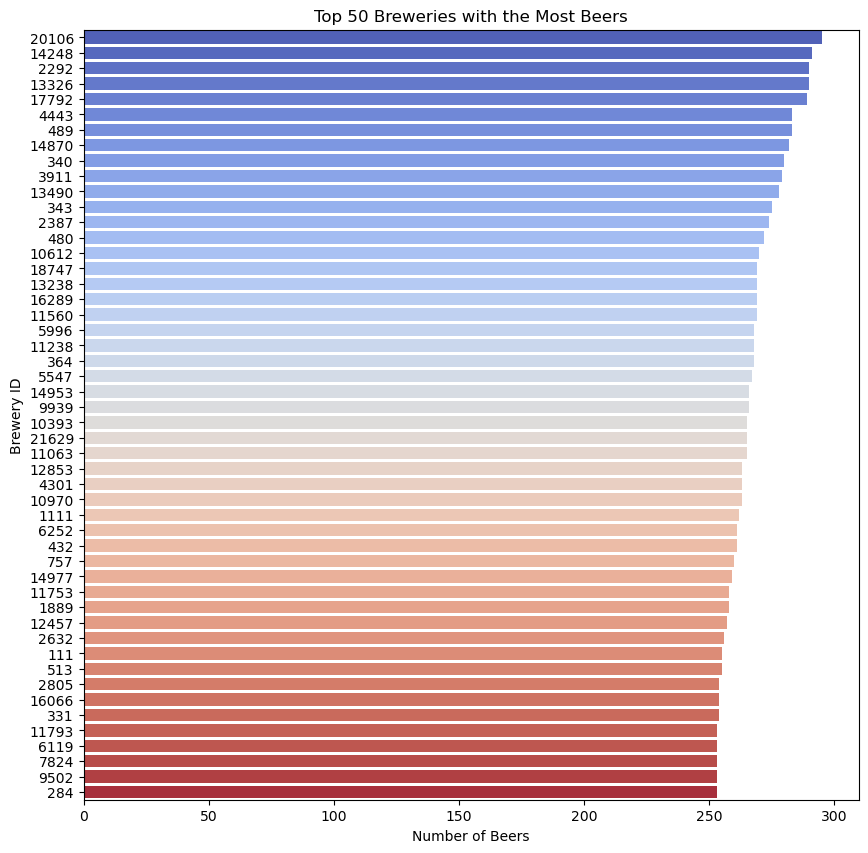

In [37]:
plt.figure(figsize=(10, 10))
top_50 = rb_breweries.sort_values(ascending=False, by='nbr_beers').head(50)
top_50['id'] = top_50['id'].astype(str)
sns.barplot(data=top_50, x='nbr_beers', y='id', hue='id', palette='coolwarm')
plt.title('Top 50 Breweries with the Most Beers')
plt.xlabel('Number of Beers')
plt.ylabel('Brewery ID')
plt.show()

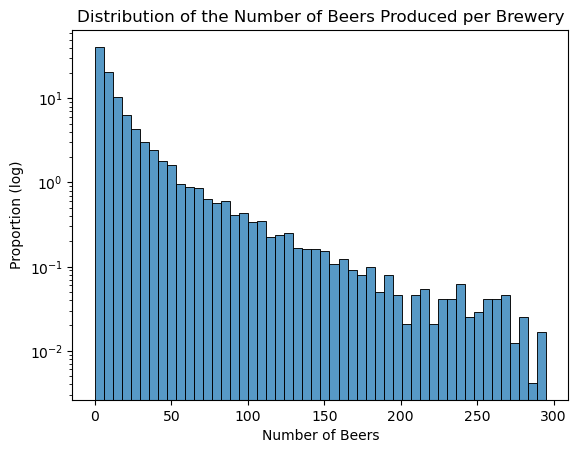

In [38]:
sns.histplot(rb_breweries['nbr_beers'], bins=50, stat='percent')
plt.title('Distribution of the Number of Beers Produced per Brewery')
plt.yscale('log')
plt.xlabel('Number of Beers')
plt.ylabel('Proportion (log)')
plt.show()

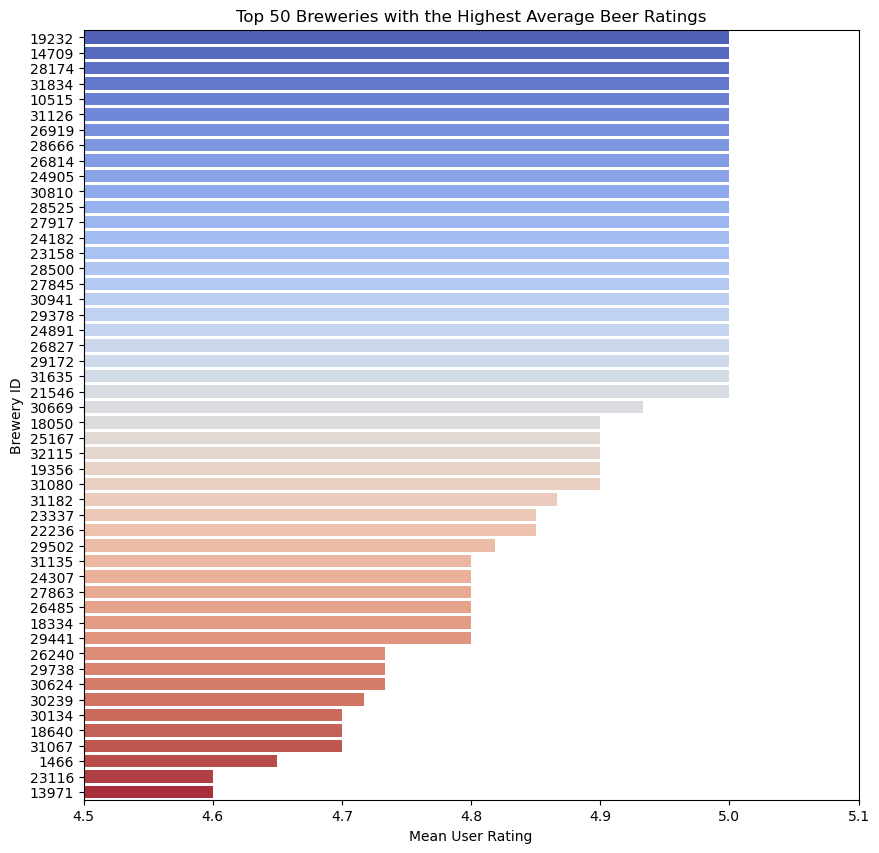

In [39]:
plt.figure(figsize=(10, 10))
top_50 = unique_brewery.sort_values(ascending=False, by='avg_computed_mean').head(50)
top_50['brewery_id'] = top_50['brewery_id'].astype(str)
min_top_50 = min(top_50['avg_computed_mean'])
max_top_50 = max(top_50['avg_computed_mean'])
sns.barplot(data=top_50, x='avg_computed_mean', y='brewery_id', hue='brewery_id', palette='coolwarm')
plt.xlim(min_top_50 - 0.1, max_top_50 + 0.1)
plt.title('Top 50 Breweries with the Highest Average Beer Ratings')
plt.xlabel('Mean User Rating')
plt.ylabel('Brewery ID')
plt.show()

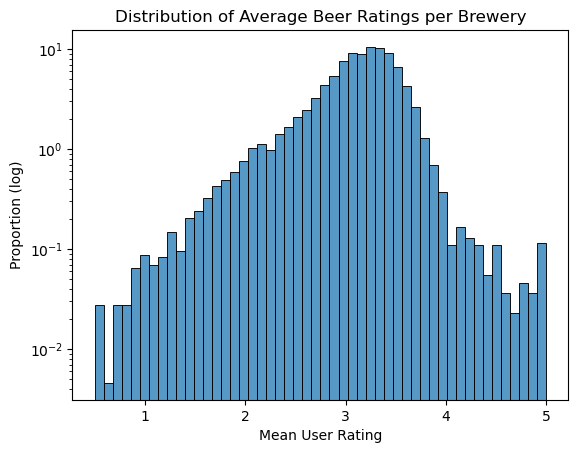

In [40]:
sns.histplot(unique_brewery['avg_computed_mean'], bins=50, stat='percent')
plt.title('Distribution of Average Beer Ratings per Brewery')
plt.yscale('log')
plt.xlabel('Mean User Rating')
plt.ylabel('Proportion (log)')
plt.show()

# More on BeerAdvocate

In [41]:
ba_beers['avg_computed'].value_counts()

avg_computed
4.000000    6483
3.750000    5720
3.500000    5135
4.250000    2265
3.000000    2141
            ... 
3.775865       1
3.723765       1
3.649545       1
4.048780       1
3.485200       1
Name: count, Length: 47937, dtype: int64

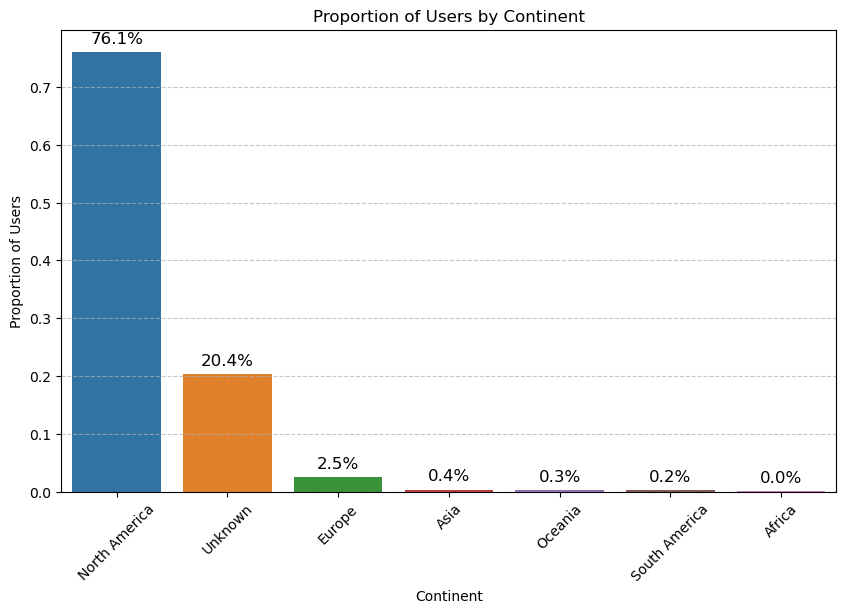

In [42]:
user_counts_by_continent = ba_users['continent'].value_counts()
total_users = ba_users['continent'].count()
proportion_by_continent = user_counts_by_continent / total_users

proportion_df = proportion_by_continent.reset_index()
proportion_df.columns = ['Continent', 'Proportion']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=proportion_df, x='Continent', y='Proportion', palette="tab10", hue="Continent")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.01, f'{height * 100:.1f}%', 
            ha='center', va='bottom', color='black', fontsize=12)
plt.title("Proportion of Users by Continent")
plt.xlabel("Continent")
plt.ylabel("Proportion of Users")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

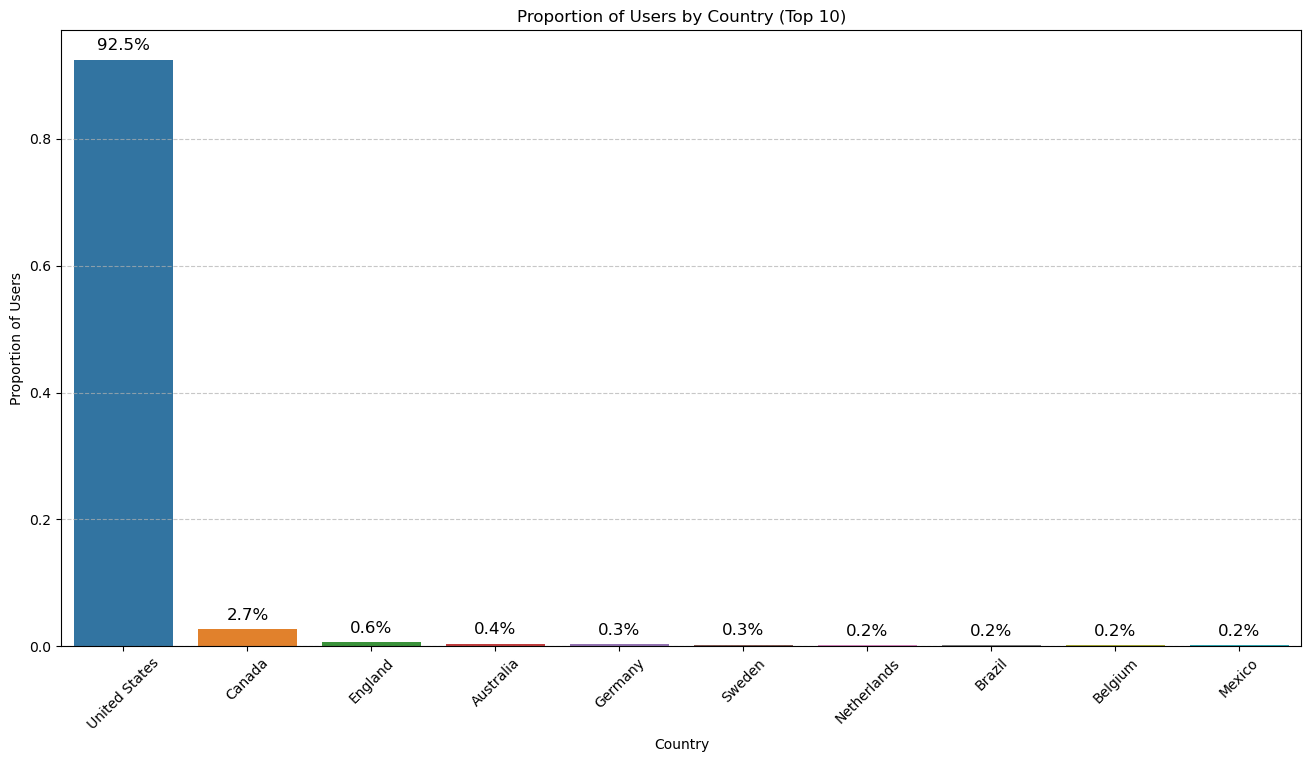

In [43]:
user_counts_by_country = ba_users['country'].value_counts()
total_users = ba_users['country'].count()
proportion_by_country = user_counts_by_country / total_users

proportion_country_df = proportion_by_country.reset_index()
proportion_country_df.columns = ['Country', 'Proportion']
top_10_countries = proportion_country_df.head(10)

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=top_10_countries, x='Country', y='Proportion', hue='Country', palette="tab10")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.01, f'{height * 100:.1f}%', 
            ha='center', va='bottom', color='black', fontsize=12)
plt.title("Proportion of Users by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Proportion of Users")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

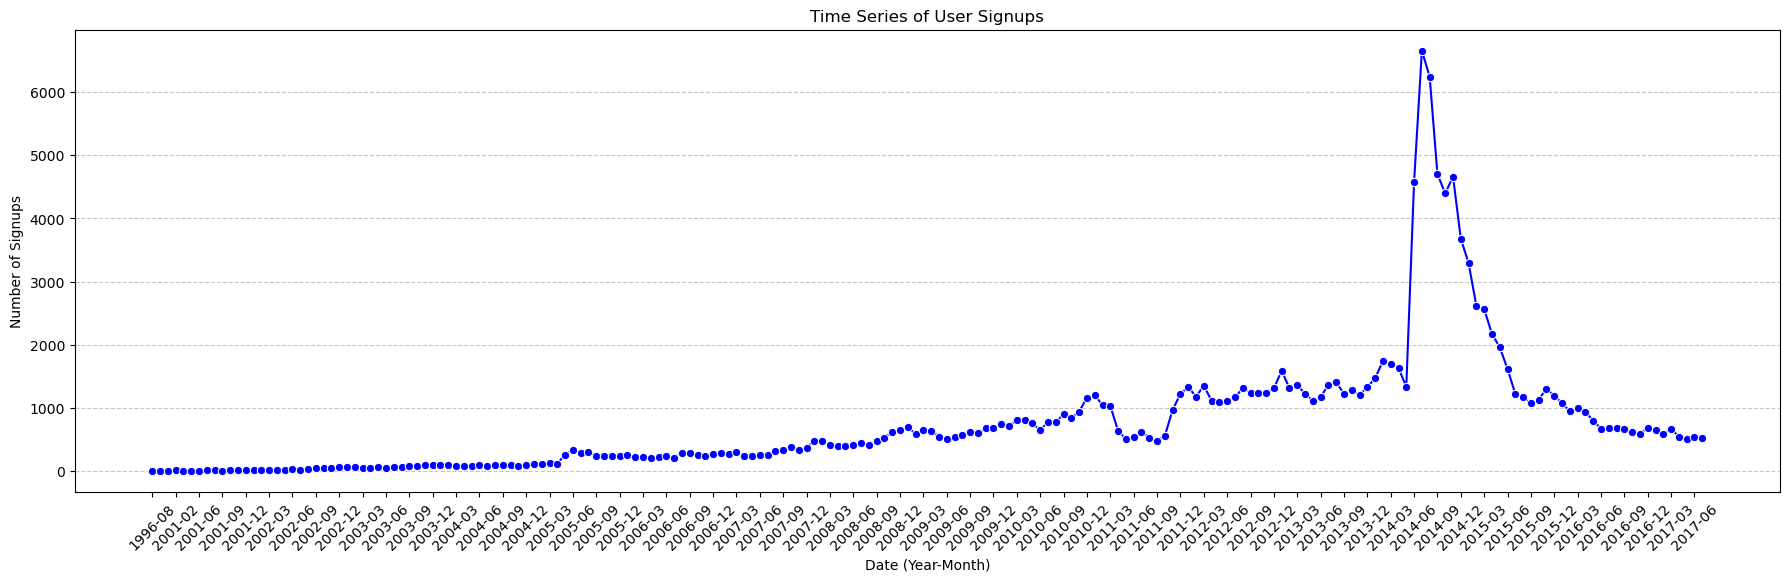

In [44]:
ba_users['joined'] = pd.to_datetime(ba_users['joined'], format='%d/%m/%Y', errors='coerce')
ba_users = ba_users.dropna(subset=['joined'])
ba_users['year_month'] = ba_users['joined'].dt.to_period('M')
monthly_signups = ba_users['year_month'].value_counts().sort_index()
plt.figure(figsize=(22, 6))
sns.lineplot(x=monthly_signups.index.astype(str), y=monthly_signups.values, marker='o', color="b")
plt.title("Time Series of User Signups")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Number of Signups")
plt.xticks(ticks=range(0, len(monthly_signups.index), 3), labels=monthly_signups.index[::3].astype(str), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()